##### Name :- Mansi Nagpal
email id:-Mansinagpal786@gmail.com


Evaluation Project - 1
Baseball Case Study
Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

For downloading the dataset, use the link given below.

Dataset Link-
•	https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/baseball.csv


###### First I've uploaded all the required basic libraries for data manipulation,numeric and static libraries like pandas,numpy,scipy and data visulaization tool like seaborn and matplotlib

In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.stats import zscore,boxcox
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
#  check  data type of each column 
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

###### In this dataset I've to Predict the Wins(W) for baseball matches. Since Win attribute is in the form of continuous number hence will build Regression model for predicting the same

##### Exploratory Data Analysis(EDA)

In [4]:
print('Total Rows are-',df.shape[0])
print('Total Columns are-',df.shape[1])
print('Shape is-',df.shape)

Total Rows are- 30
Total Columns are- 17
Shape is- (30, 17)


###### As,we can see that there are only 30 rows and 17 columns including the Target Variable-Wins(W).In this project I've to train the Regression model so that I can simply predict the wins for baseball matches.Also, there are only float or int attributes are present in this dataframe and no objects are present.

In [5]:
df.ndim

2

In [6]:
df.size

510

In [7]:
#columns of the dataframes are numeric-
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [8]:
df.index

RangeIndex(start=0, stop=30, step=1)

In [9]:
#it shows top 5 rows
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [10]:
#it shows bottom 5 rows
df.sample()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101


In [11]:
#it shows any one random rows
df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [12]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [14]:
df.isnull()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df.isnull().any()

W      False
R      False
AB     False
H      False
2B     False
3B     False
HR     False
BB     False
SO     False
SB     False
RA     False
ER     False
ERA    False
CG     False
SHO    False
SV     False
E      False
dtype: bool

In [16]:
df.isnull().any().any()

False

In [17]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [18]:
df.isnull().sum().sum()

0

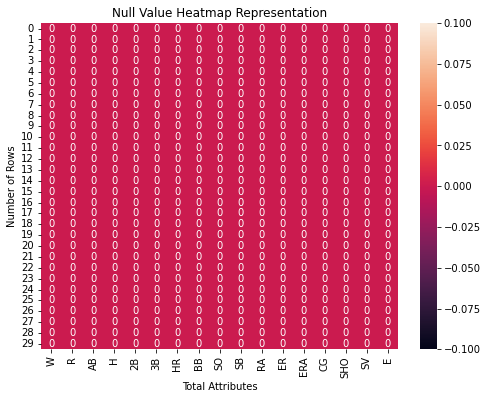

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),annot=True)
plt.xlabel('Total Attributes',fontsize=10,loc='center')
plt.ylabel('Number of Rows',fontsize=10,loc='center')
plt.title('Null Value Heatmap Representation')
plt.xticks(rotation=90)
plt.show()

In [20]:
l=['W','R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','E']
for i in l:
    print(f'Total Unique Value for attribute {i} are\n {df[i].unique()}')
    print('\n')

Total Unique Value for attribute W are
 [ 95  83  81  76  74  93  87  80  78  88  86  85  68 100  98  97  64  90
  71  67  63  92  84  79]


Total Unique Value for attribute R are
 [724 696 669 622 689 891 764 713 644 748 751 729 661 656 694 647 697 655
 640 683 703 613 573 626 667 720 650 737]


Total Unique Value for attribute AB are
 [5575 5467 5439 5533 5605 5509 5567 5485 5640 5511 5459 5417 5544 5600
 5484 5631 5491 5480 5571 5527 5428 5463 5420 5529 5385 5565 5649 5457
 5572]


Total Unique Value for attribute H are
 [1497 1349 1395 1381 1515 1480 1397 1370 1383 1495 1419 1363 1331 1379
 1405 1386 1462 1341 1378 1382 1351 1420 1361 1374 1346 1486 1494 1324
 1479]


Total Unique Value for attribute 2B are
 [300 277 303 260 289 308 272 246 278 294 279 243 262 288 292 274 257 295
 265 236 251 263]


Total Unique Value for attribute 3B are
 [42 44 29 27 49 17 19 20 32 33 26 21 22 46 39 30 34 13 40 18 37 48 36]


Total Unique Value for attribute HR are
 [139 156 141 136 151 232 212 2

In [21]:
l=['W','R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','E']
for i in l:
    print(f'Total Value counts for attribute {i} are\n {df[i].value_counts()}')
    print('\n')

Total Value counts for attribute W are
 68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64


Total Value counts for attribute R are
 689    2
696    2
724    1
647    1
650    1
720    1
667    1
626    1
573    1
613    1
703    1
683    1
640    1
655    1
697    1
694    1
656    1
661    1
729    1
751    1
748    1
644    1
713    1
764    1
891    1
622    1
669    1
737    1
Name: R, dtype: int64


Total Value counts for attribute AB are
 5485    2
5575    1
5631    1
5457    1
5649    1
5565    1
5385    1
5529    1
5420    1
5463    1
5428    1
5527    1
5571    1
5480    1
5491    1
5484    1
5467    1
5600    1
5544    1
5417    1
5459    1
5511    1
5640    1
5567    1
5509    1
5605    1
5533    1
5439    1
5572    1
Name: AB, dtype: int64


Total Value counts for attribute H are
 1363    

###### The above output are representing the total count of all the unique values for each attributes.
See we can refer the above output to know the count for each attributes,and we can also see that the data's are equally distributed w.r.t. all the attributes

##### Data Visualization

###### 1.Countplot

This is the Countplot diagram for--- W
AxesSubplot(0.125,0.125;0.775x0.755)


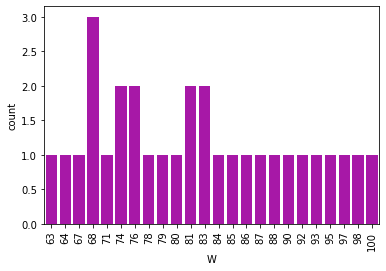



This is the Countplot diagram for--- R
AxesSubplot(0.125,0.125;0.775x0.755)


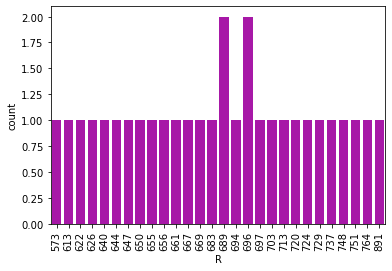



This is the Countplot diagram for--- AB
AxesSubplot(0.125,0.125;0.775x0.755)


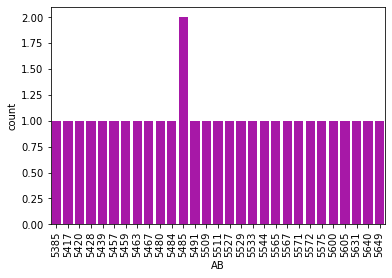



This is the Countplot diagram for--- H
AxesSubplot(0.125,0.125;0.775x0.755)


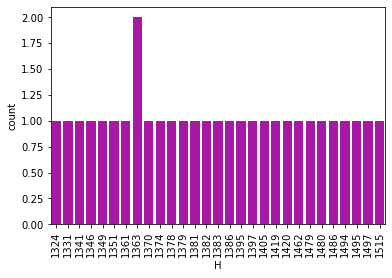



This is the Countplot diagram for--- 2B
AxesSubplot(0.125,0.125;0.775x0.755)


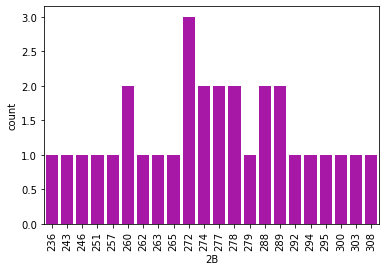



This is the Countplot diagram for--- 3B
AxesSubplot(0.125,0.125;0.775x0.755)


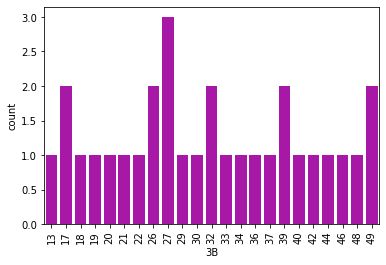



This is the Countplot diagram for--- HR
AxesSubplot(0.125,0.125;0.775x0.755)


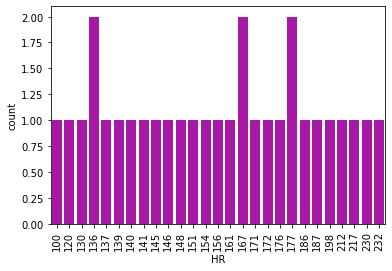



This is the Countplot diagram for--- BB
AxesSubplot(0.125,0.125;0.775x0.755)


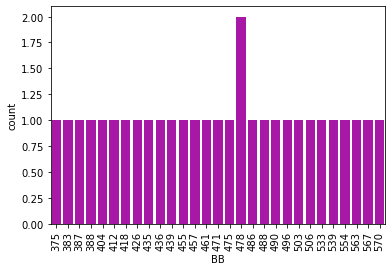



This is the Countplot diagram for--- SO
AxesSubplot(0.125,0.125;0.775x0.755)


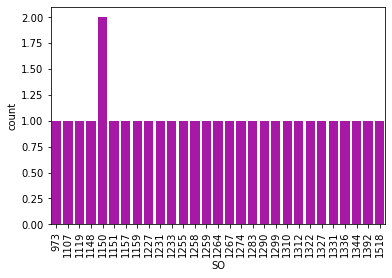



This is the Countplot diagram for--- SB
AxesSubplot(0.125,0.125;0.775x0.755)


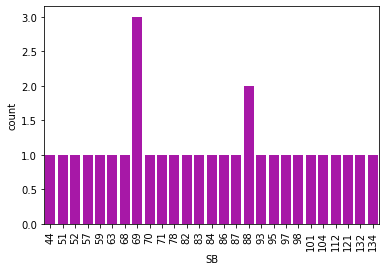



This is the Countplot diagram for--- RA
AxesSubplot(0.125,0.125;0.775x0.755)


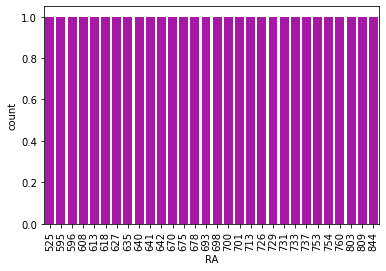



This is the Countplot diagram for--- ER
AxesSubplot(0.125,0.125;0.775x0.755)


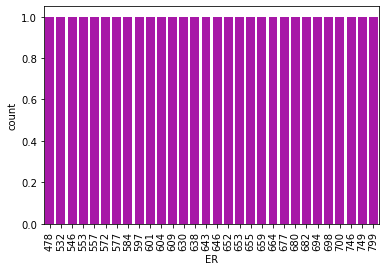



This is the Countplot diagram for--- ERA
AxesSubplot(0.125,0.125;0.775x0.755)


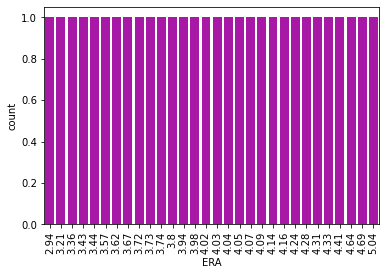



This is the Countplot diagram for--- CG
AxesSubplot(0.125,0.125;0.775x0.755)


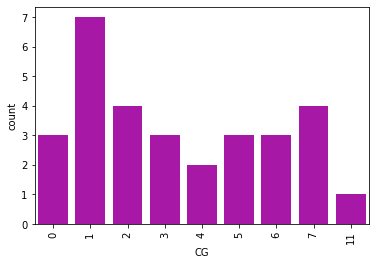



This is the Countplot diagram for--- SHO
AxesSubplot(0.125,0.125;0.775x0.755)


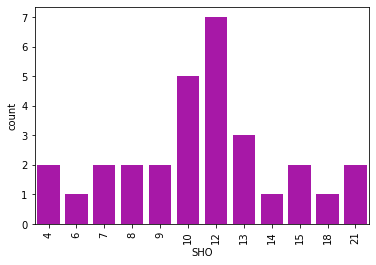



This is the Countplot diagram for--- SV
AxesSubplot(0.125,0.125;0.775x0.755)


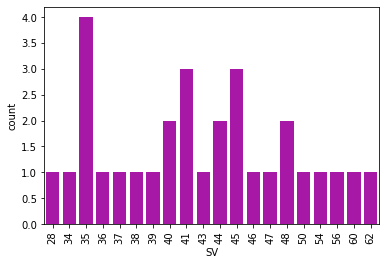



This is the Countplot diagram for--- E
AxesSubplot(0.125,0.125;0.775x0.755)


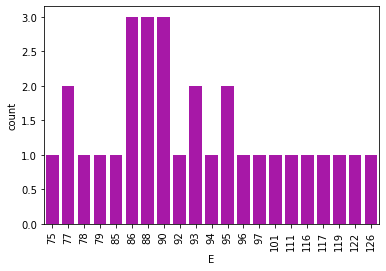

In [22]:
l=['W','R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','E']
for i in l:
    print(f'This is the Countplot diagram for--- {i}')
    print(sns.countplot(df[i],color='m'))
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

###### This plot basically do the comparision of their counts with respect to given attributes.
As we can see that data is almost equally spread over the attributes.

##### 2. Histogram

This is the Histogram diagram for--- W
AxesSubplot(0.125,0.125;0.775x0.755)


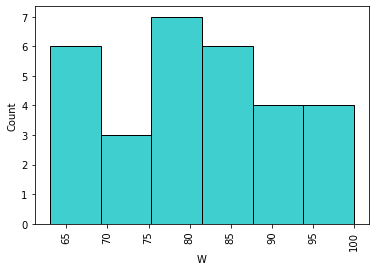



This is the Histogram diagram for--- R
AxesSubplot(0.125,0.125;0.775x0.755)


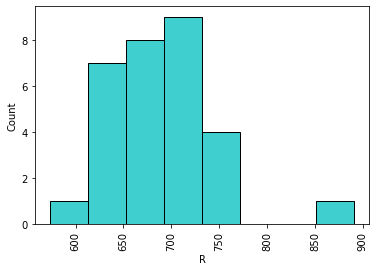



This is the Histogram diagram for--- AB
AxesSubplot(0.125,0.125;0.775x0.755)


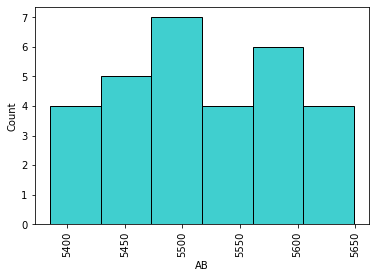



This is the Histogram diagram for--- H
AxesSubplot(0.125,0.125;0.775x0.755)


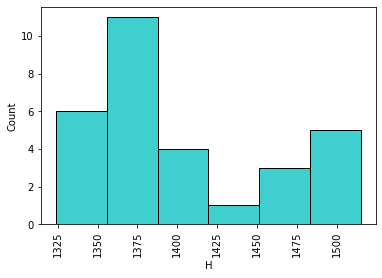



This is the Histogram diagram for--- 2B
AxesSubplot(0.125,0.125;0.775x0.755)


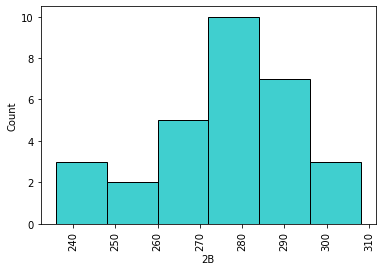



This is the Histogram diagram for--- 3B
AxesSubplot(0.125,0.125;0.775x0.755)


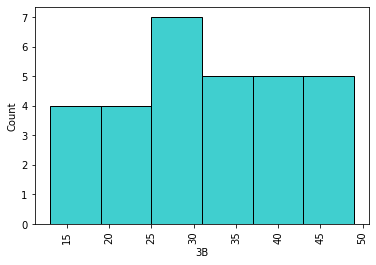



This is the Histogram diagram for--- HR
AxesSubplot(0.125,0.125;0.775x0.755)


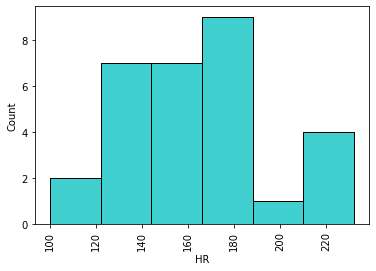



This is the Histogram diagram for--- BB
AxesSubplot(0.125,0.125;0.775x0.755)


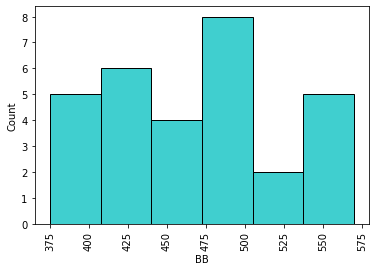



This is the Histogram diagram for--- SO
AxesSubplot(0.125,0.125;0.775x0.755)


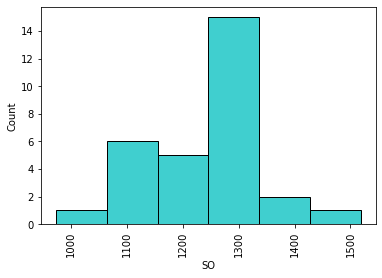



This is the Histogram diagram for--- SB
AxesSubplot(0.125,0.125;0.775x0.755)


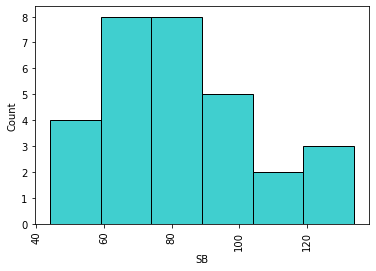



This is the Histogram diagram for--- RA
AxesSubplot(0.125,0.125;0.775x0.755)


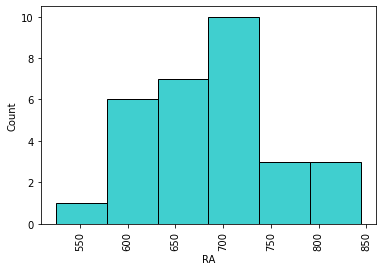



This is the Histogram diagram for--- ER
AxesSubplot(0.125,0.125;0.775x0.755)


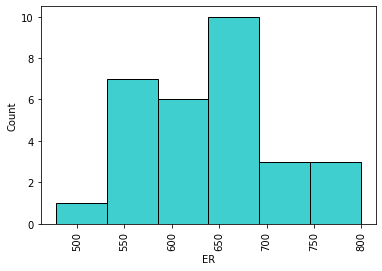



This is the Histogram diagram for--- ERA
AxesSubplot(0.125,0.125;0.775x0.755)


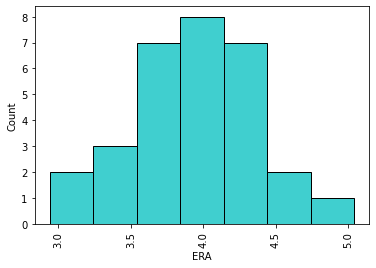



This is the Histogram diagram for--- CG
AxesSubplot(0.125,0.125;0.775x0.755)


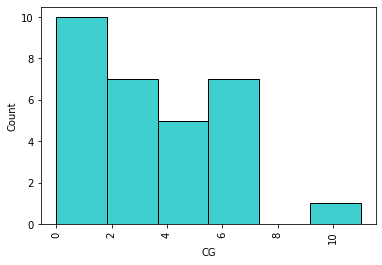



This is the Histogram diagram for--- SHO
AxesSubplot(0.125,0.125;0.775x0.755)


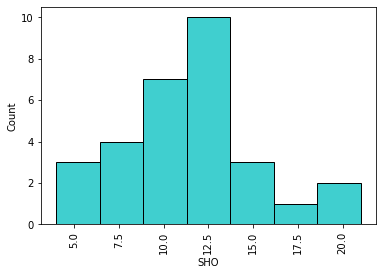



This is the Histogram diagram for--- SV
AxesSubplot(0.125,0.125;0.775x0.755)


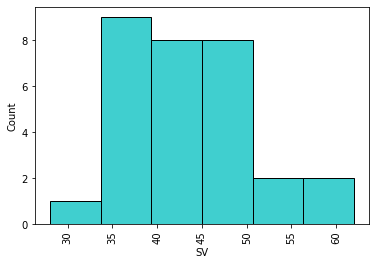



This is the Histogram diagram for--- E
AxesSubplot(0.125,0.125;0.775x0.755)


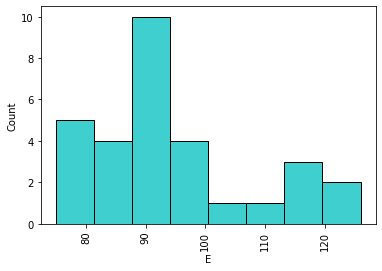

In [23]:
l=['W','R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','E']
for i in l:
    print(f'This is the Histogram diagram for--- {i}')
    print(sns.histplot(df[i],color='c'))
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

###### Explanation is same as above Countplot

##### 3. Violinplot

This is the Violinplot diagram for--- W
AxesSubplot(0.125,0.125;0.775x0.755)


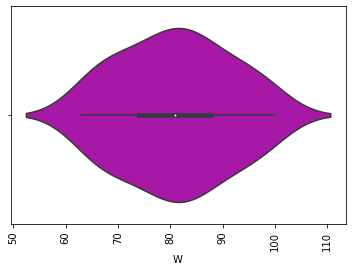



This is the Violinplot diagram for--- R
AxesSubplot(0.125,0.125;0.775x0.755)


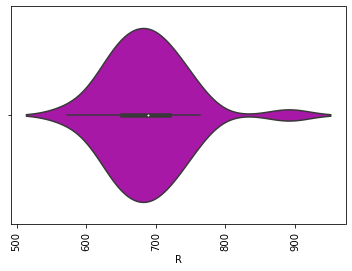



This is the Violinplot diagram for--- AB
AxesSubplot(0.125,0.125;0.775x0.755)


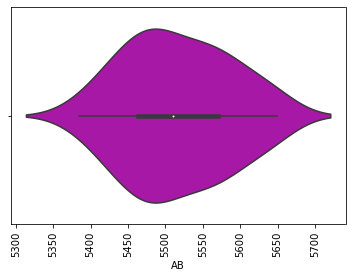



This is the Violinplot diagram for--- H
AxesSubplot(0.125,0.125;0.775x0.755)


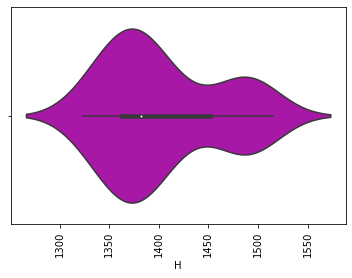



This is the Violinplot diagram for--- 2B
AxesSubplot(0.125,0.125;0.775x0.755)


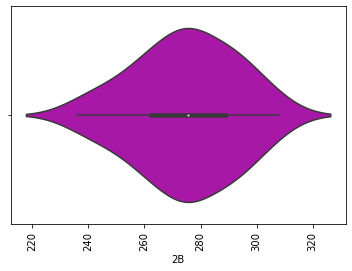



This is the Violinplot diagram for--- 3B
AxesSubplot(0.125,0.125;0.775x0.755)


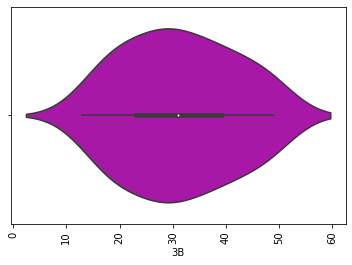



This is the Violinplot diagram for--- HR
AxesSubplot(0.125,0.125;0.775x0.755)


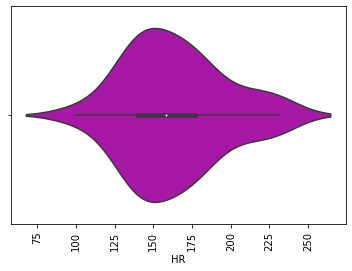



This is the Violinplot diagram for--- BB
AxesSubplot(0.125,0.125;0.775x0.755)


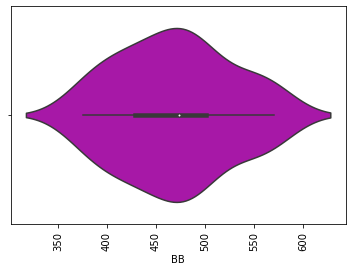



This is the Violinplot diagram for--- SO
AxesSubplot(0.125,0.125;0.775x0.755)


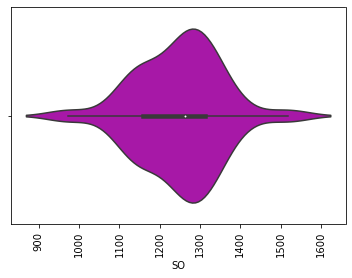



This is the Violinplot diagram for--- SB
AxesSubplot(0.125,0.125;0.775x0.755)


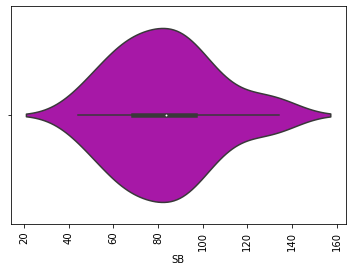



This is the Violinplot diagram for--- RA
AxesSubplot(0.125,0.125;0.775x0.755)


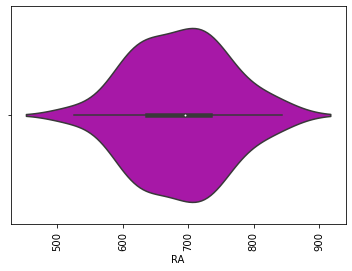



This is the Violinplot diagram for--- ER
AxesSubplot(0.125,0.125;0.775x0.755)


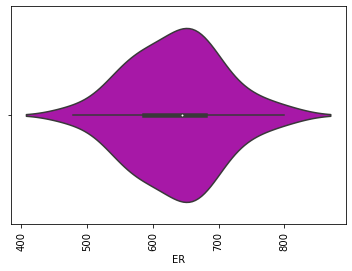



This is the Violinplot diagram for--- ERA
AxesSubplot(0.125,0.125;0.775x0.755)


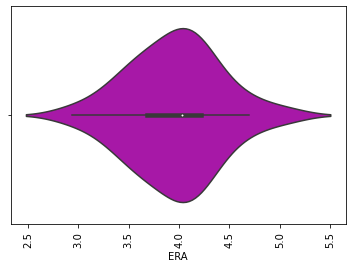



This is the Violinplot diagram for--- CG
AxesSubplot(0.125,0.125;0.775x0.755)


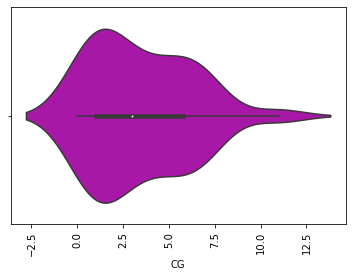



This is the Violinplot diagram for--- SHO
AxesSubplot(0.125,0.125;0.775x0.755)


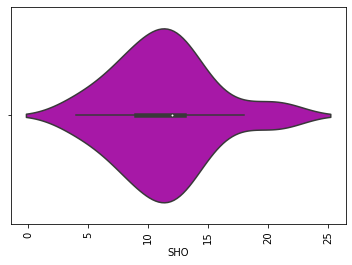



This is the Violinplot diagram for--- SV
AxesSubplot(0.125,0.125;0.775x0.755)


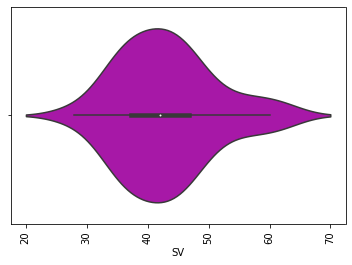



This is the Violinplot diagram for--- E
AxesSubplot(0.125,0.125;0.775x0.755)


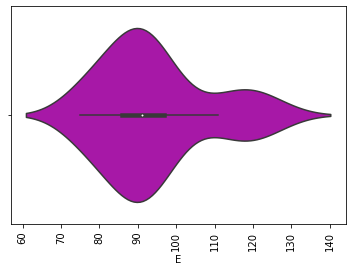

In [24]:
l=['W','R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','E']
for i in l:
    print(f'This is the Violinplot diagram for--- {i}')
    print(sns.violinplot(df[i],color='m'))
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

###### We can plot Violinplot diagram only for numeric columns as it doesn't support Categorical Columns. It's basically give us an idea like,what is the range of the respective attributes which are having large amount of data
The value range for the win attribute is mostly in b/w 70-90

###### 4. Scatterplot

This is a Scatterplot diagram b/w attributes- W & R
AxesSubplot(0.125,0.125;0.775x0.755)


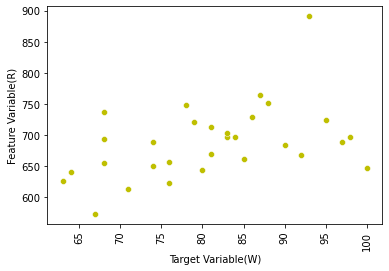



This is a Scatterplot diagram b/w attributes- W & AB
AxesSubplot(0.125,0.125;0.775x0.755)


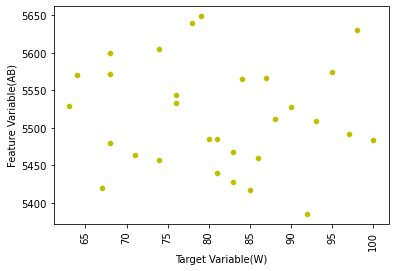



This is a Scatterplot diagram b/w attributes- W & H
AxesSubplot(0.125,0.125;0.775x0.755)


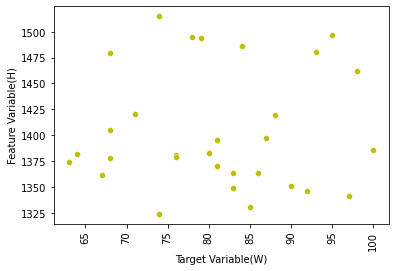



This is a Scatterplot diagram b/w attributes- W & 2B
AxesSubplot(0.125,0.125;0.775x0.755)


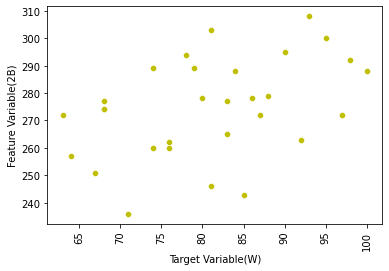



This is a Scatterplot diagram b/w attributes- W & 3B
AxesSubplot(0.125,0.125;0.775x0.755)


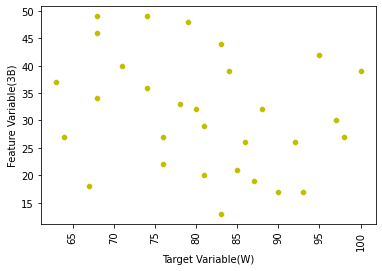



This is a Scatterplot diagram b/w attributes- W & HR
AxesSubplot(0.125,0.125;0.775x0.755)


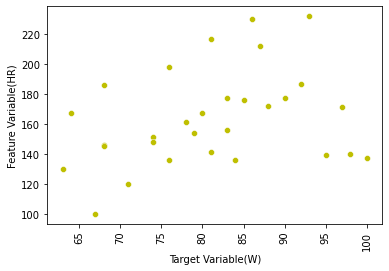



This is a Scatterplot diagram b/w attributes- W & BB
AxesSubplot(0.125,0.125;0.775x0.755)


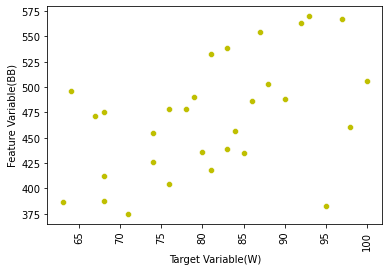



This is a Scatterplot diagram b/w attributes- W & SO
AxesSubplot(0.125,0.125;0.775x0.755)


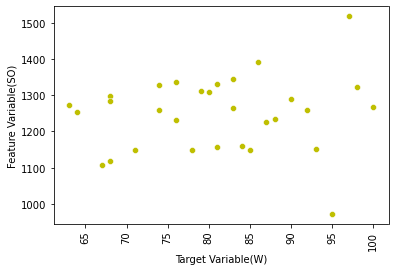



This is a Scatterplot diagram b/w attributes- W & SB
AxesSubplot(0.125,0.125;0.775x0.755)


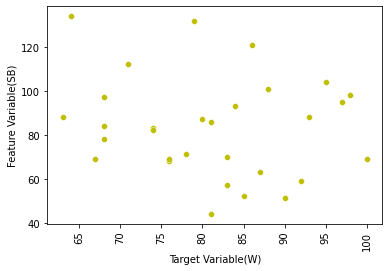



This is a Scatterplot diagram b/w attributes- W & RA
AxesSubplot(0.125,0.125;0.775x0.755)


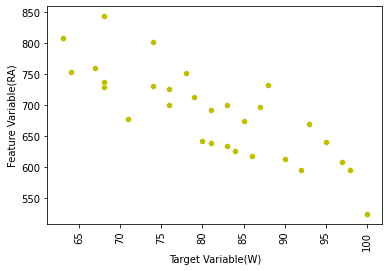



This is a Scatterplot diagram b/w attributes- W & ER
AxesSubplot(0.125,0.125;0.775x0.755)


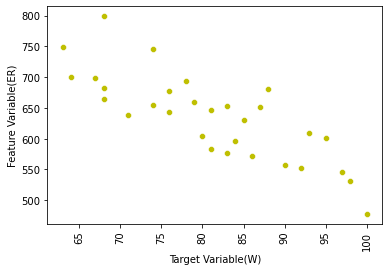



This is a Scatterplot diagram b/w attributes- W & ERA
AxesSubplot(0.125,0.125;0.775x0.755)


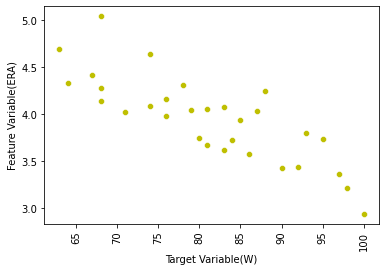



This is a Scatterplot diagram b/w attributes- W & CG
AxesSubplot(0.125,0.125;0.775x0.755)


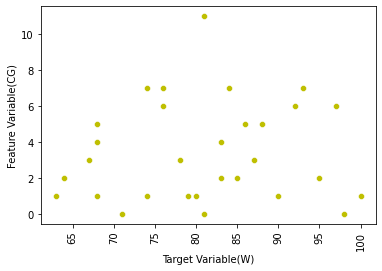



This is a Scatterplot diagram b/w attributes- W & SHO
AxesSubplot(0.125,0.125;0.775x0.755)


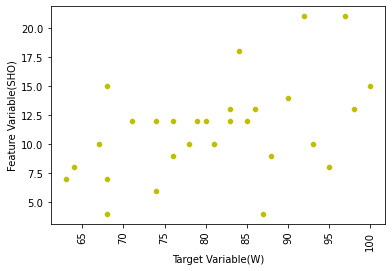



This is a Scatterplot diagram b/w attributes- W & SV
AxesSubplot(0.125,0.125;0.775x0.755)


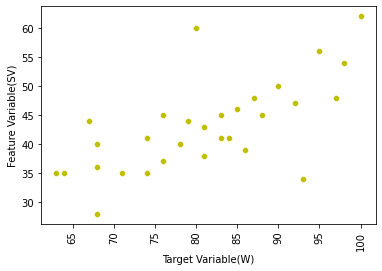



This is a Scatterplot diagram b/w attributes- W & E
AxesSubplot(0.125,0.125;0.775x0.755)


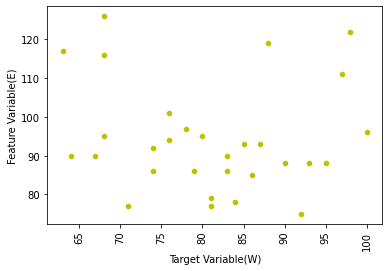

In [25]:
l=['R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','E']
for i in l:
    print(f'This is a Scatterplot diagram b/w attributes- W & {i}')
    print(sns.scatterplot(x=df.W,y=df[i],color='y'))
    plt.xlabel('Target Variable(W)')
    plt.ylabel(f'Feature Variable({i})')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

###### There is negatice correlation of wins w.r.t. attributes RA,ER,ERA and positive correlation of Win w.r.t. SV

###### 5. Lineplot

This is a Lineplot diagram b/w attributes- W & R
AxesSubplot(0.125,0.125;0.775x0.755)


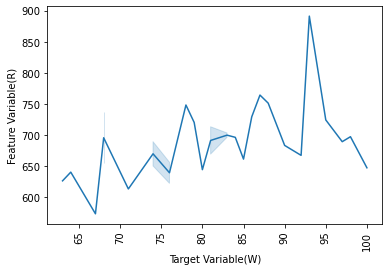



This is a Lineplot diagram b/w attributes- W & AB
AxesSubplot(0.125,0.125;0.775x0.755)


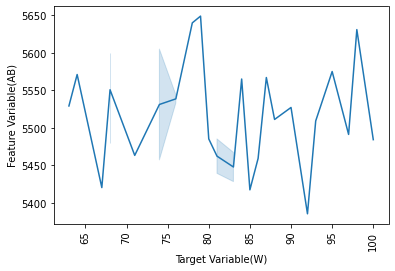



This is a Lineplot diagram b/w attributes- W & H
AxesSubplot(0.125,0.125;0.775x0.755)


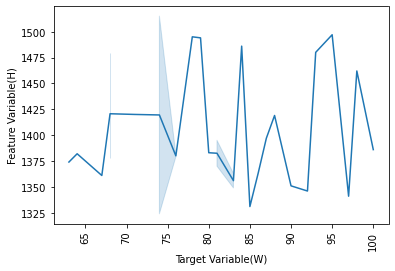



This is a Lineplot diagram b/w attributes- W & 2B
AxesSubplot(0.125,0.125;0.775x0.755)


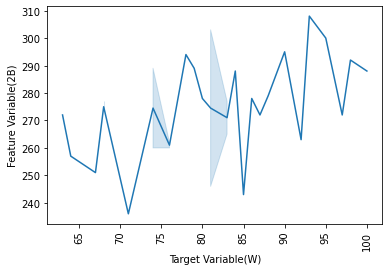



This is a Lineplot diagram b/w attributes- W & 3B
AxesSubplot(0.125,0.125;0.775x0.755)


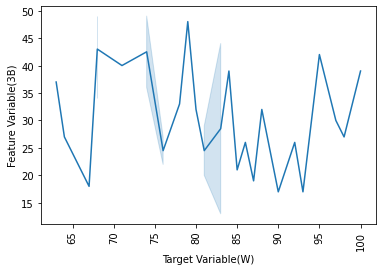



This is a Lineplot diagram b/w attributes- W & HR
AxesSubplot(0.125,0.125;0.775x0.755)


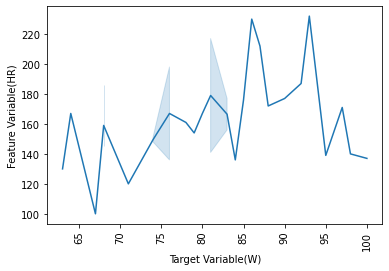



This is a Lineplot diagram b/w attributes- W & BB
AxesSubplot(0.125,0.125;0.775x0.755)


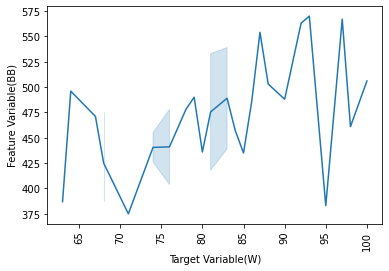



This is a Lineplot diagram b/w attributes- W & SO
AxesSubplot(0.125,0.125;0.775x0.755)


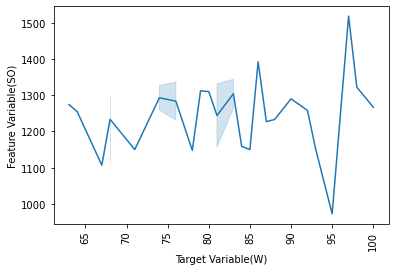



This is a Lineplot diagram b/w attributes- W & SB
AxesSubplot(0.125,0.125;0.775x0.755)


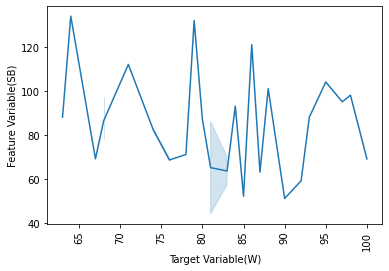



This is a Lineplot diagram b/w attributes- W & RA
AxesSubplot(0.125,0.125;0.775x0.755)


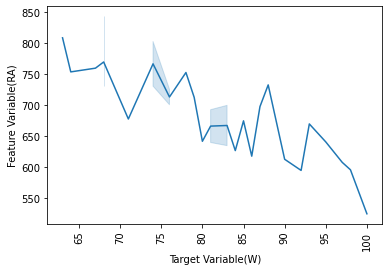



This is a Lineplot diagram b/w attributes- W & ER
AxesSubplot(0.125,0.125;0.775x0.755)


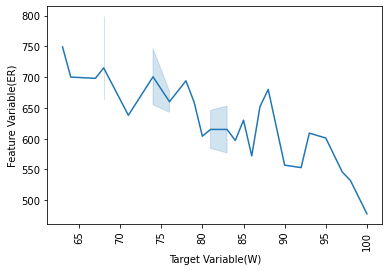



This is a Lineplot diagram b/w attributes- W & ERA
AxesSubplot(0.125,0.125;0.775x0.755)


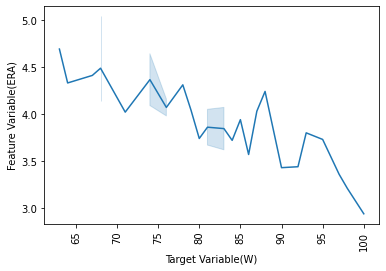



This is a Lineplot diagram b/w attributes- W & CG
AxesSubplot(0.125,0.125;0.775x0.755)


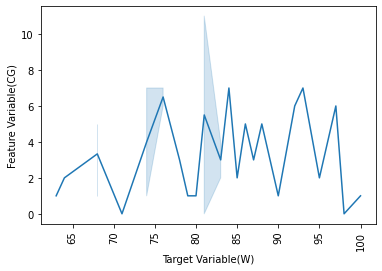



This is a Lineplot diagram b/w attributes- W & SHO
AxesSubplot(0.125,0.125;0.775x0.755)


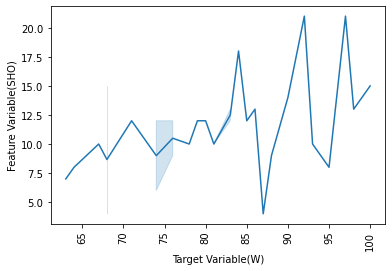



This is a Lineplot diagram b/w attributes- W & SV
AxesSubplot(0.125,0.125;0.775x0.755)


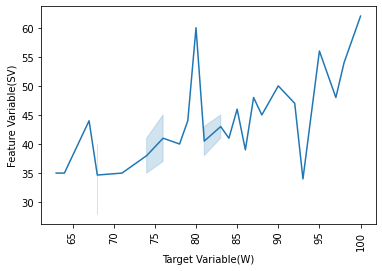



This is a Lineplot diagram b/w attributes- W & E
AxesSubplot(0.125,0.125;0.775x0.755)


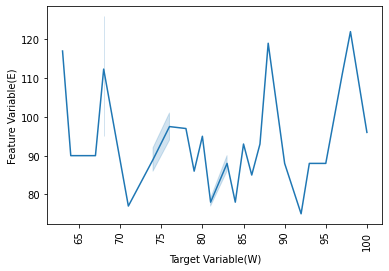

In [26]:
l=['R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','E']
for i in l:
    print(f'This is a Lineplot diagram b/w attributes- W & {i}')
    print(sns.lineplot(x=df.W,y=df[i]))
    plt.xlabel('Target Variable(W)')
    plt.ylabel(f'Feature Variable({i})')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

###### 6. Relational plot

This is a Relational diagram b/w attributes- W & R


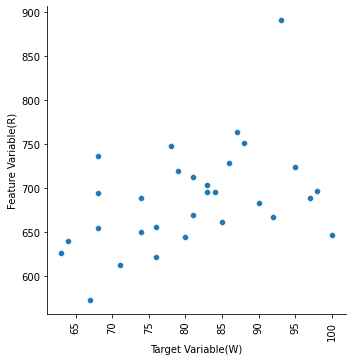



This is a Relational diagram b/w attributes- W & AB


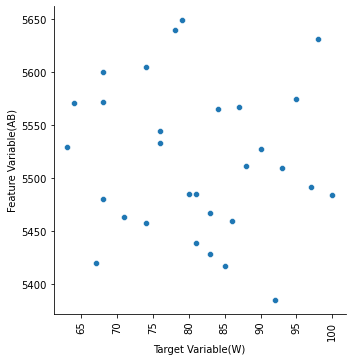



This is a Relational diagram b/w attributes- W & H


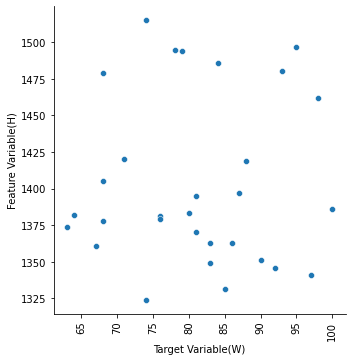



This is a Relational diagram b/w attributes- W & 2B


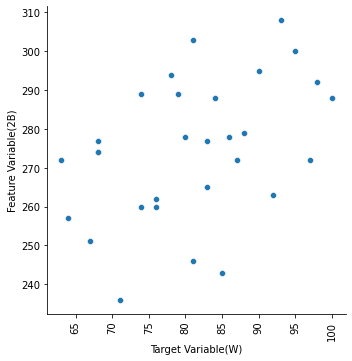



This is a Relational diagram b/w attributes- W & 3B


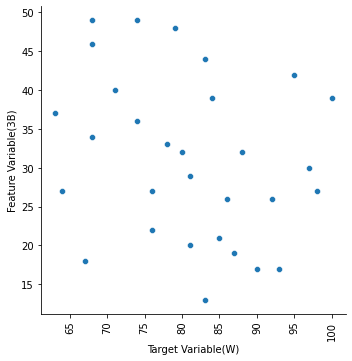



This is a Relational diagram b/w attributes- W & HR


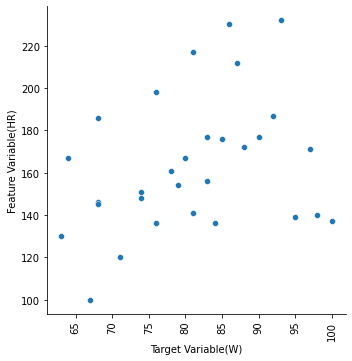



This is a Relational diagram b/w attributes- W & BB


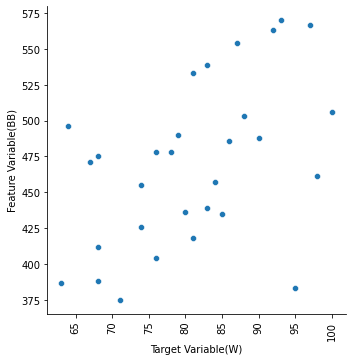



This is a Relational diagram b/w attributes- W & SO


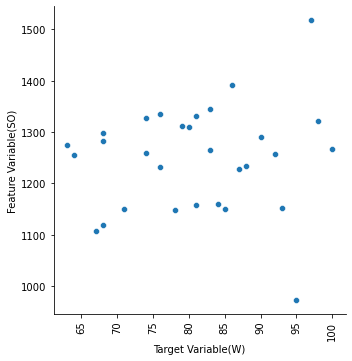



This is a Relational diagram b/w attributes- W & SB


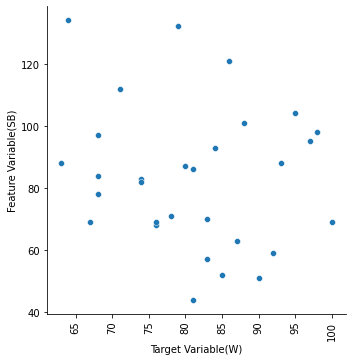



This is a Relational diagram b/w attributes- W & RA


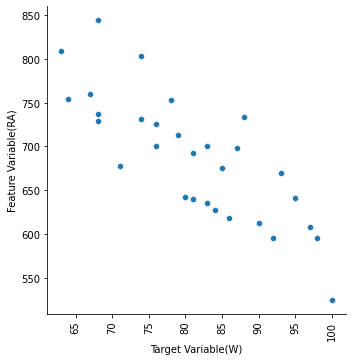



This is a Relational diagram b/w attributes- W & ER


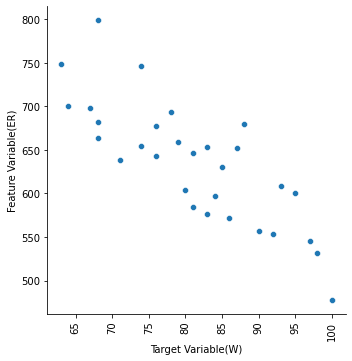



This is a Relational diagram b/w attributes- W & ERA


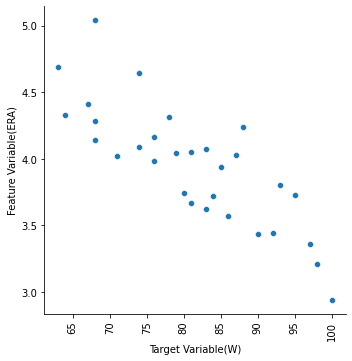



This is a Relational diagram b/w attributes- W & CG


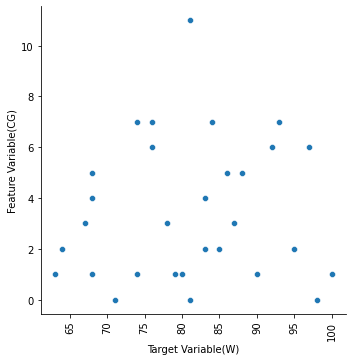



This is a Relational diagram b/w attributes- W & SHO


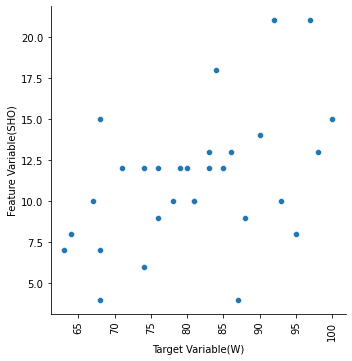



This is a Relational diagram b/w attributes- W & SV


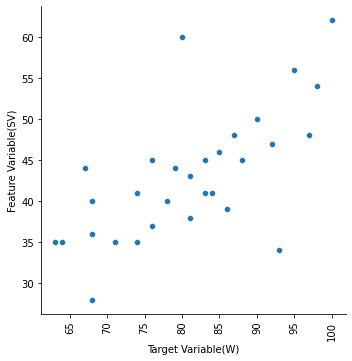



This is a Relational diagram b/w attributes- W & E


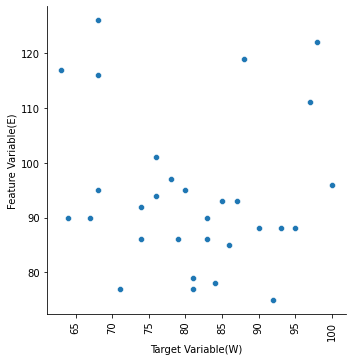

In [27]:
l=['R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','E']
for i in l:
    print(f'This is a Relational diagram b/w attributes- W & {i}')
    print(sns.relplot(x=df.W,y=df[i]))
    plt.xlabel('Target Variable(W)')
    plt.ylabel(f'Feature Variable({i})')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

###### Explanation is same as above plot

###### 6. Stripplot

This is a Stripplot diagram b/w attributes- W & R
AxesSubplot(0.125,0.125;0.775x0.755)


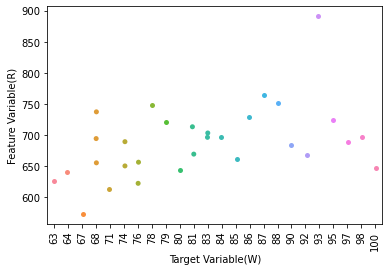



This is a Stripplot diagram b/w attributes- W & AB
AxesSubplot(0.125,0.125;0.775x0.755)


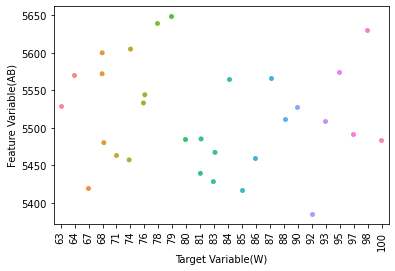



This is a Stripplot diagram b/w attributes- W & H
AxesSubplot(0.125,0.125;0.775x0.755)


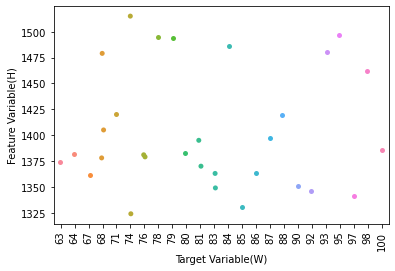



This is a Stripplot diagram b/w attributes- W & 2B
AxesSubplot(0.125,0.125;0.775x0.755)


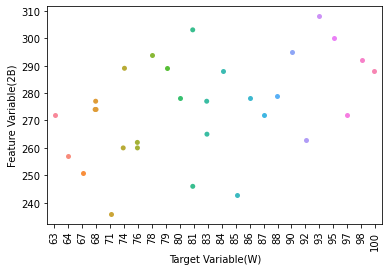



This is a Stripplot diagram b/w attributes- W & 3B
AxesSubplot(0.125,0.125;0.775x0.755)


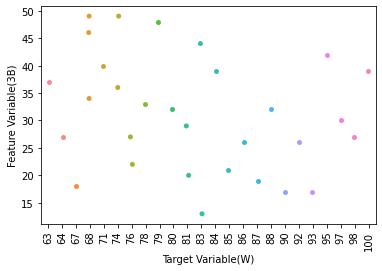



This is a Stripplot diagram b/w attributes- W & HR
AxesSubplot(0.125,0.125;0.775x0.755)


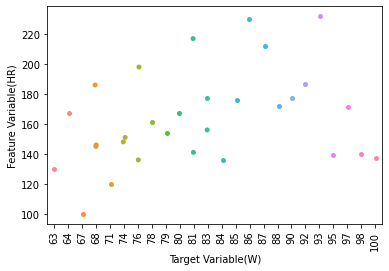



This is a Stripplot diagram b/w attributes- W & BB
AxesSubplot(0.125,0.125;0.775x0.755)


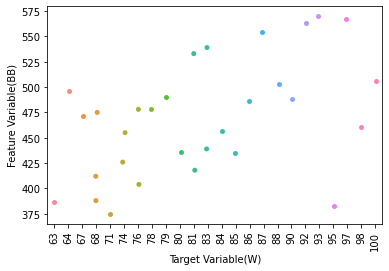



This is a Stripplot diagram b/w attributes- W & SO
AxesSubplot(0.125,0.125;0.775x0.755)


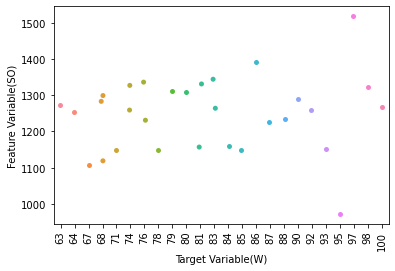



This is a Stripplot diagram b/w attributes- W & SB
AxesSubplot(0.125,0.125;0.775x0.755)


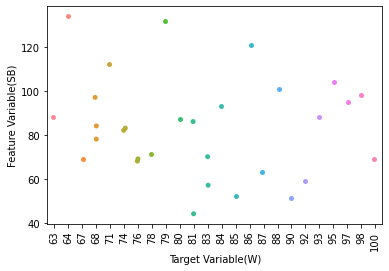



This is a Stripplot diagram b/w attributes- W & RA
AxesSubplot(0.125,0.125;0.775x0.755)


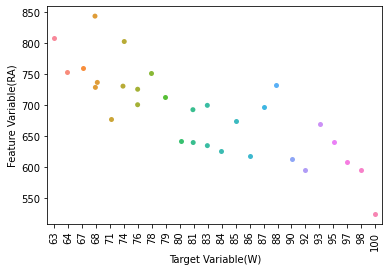



This is a Stripplot diagram b/w attributes- W & ER
AxesSubplot(0.125,0.125;0.775x0.755)


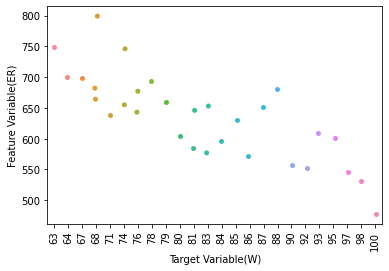



This is a Stripplot diagram b/w attributes- W & ERA
AxesSubplot(0.125,0.125;0.775x0.755)


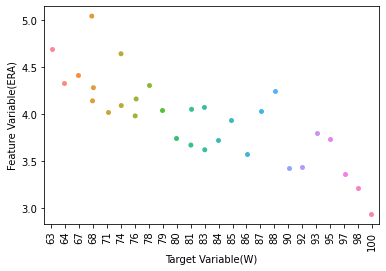



This is a Stripplot diagram b/w attributes- W & CG
AxesSubplot(0.125,0.125;0.775x0.755)


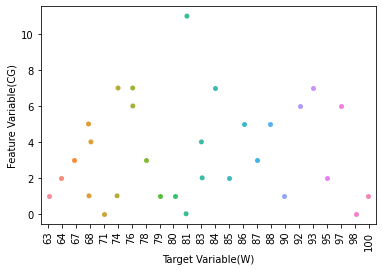



This is a Stripplot diagram b/w attributes- W & SHO
AxesSubplot(0.125,0.125;0.775x0.755)


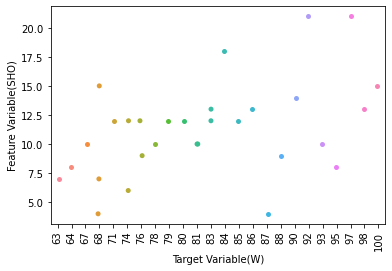



This is a Stripplot diagram b/w attributes- W & SV
AxesSubplot(0.125,0.125;0.775x0.755)


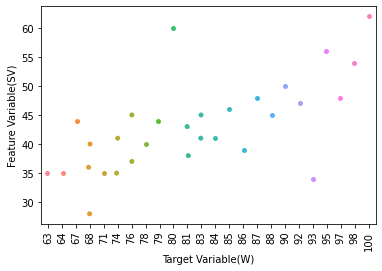



This is a Stripplot diagram b/w attributes- W & E
AxesSubplot(0.125,0.125;0.775x0.755)


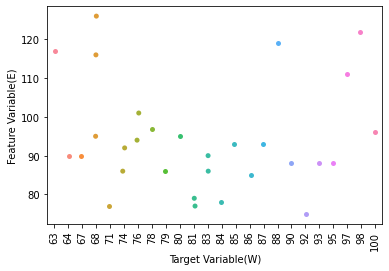

In [28]:
l=['R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','E']
for i in l:
    print(f'This is a Stripplot diagram b/w attributes- W & {i}')
    print(sns.stripplot(x=df.W,y=df[i]))
    plt.xlabel('Target Variable(W)')
    plt.ylabel(f'Feature Variable({i})')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

###### Same as above

This is a Swarmplot diagram b/w attributes- W & R
AxesSubplot(0.125,0.125;0.775x0.755)


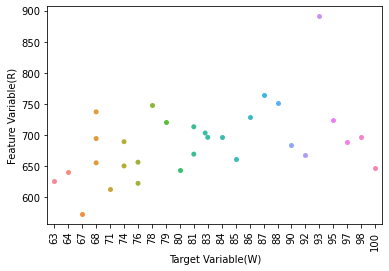



This is a Swarmplot diagram b/w attributes- W & AB
AxesSubplot(0.125,0.125;0.775x0.755)


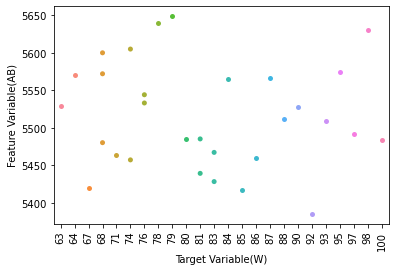



This is a Swarmplot diagram b/w attributes- W & H
AxesSubplot(0.125,0.125;0.775x0.755)


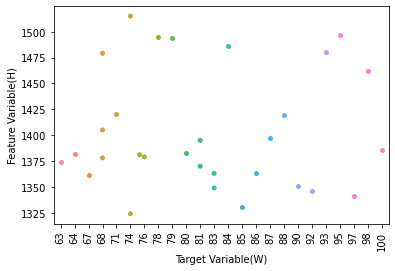



This is a Swarmplot diagram b/w attributes- W & 2B
AxesSubplot(0.125,0.125;0.775x0.755)


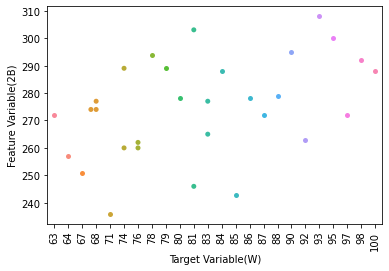



This is a Swarmplot diagram b/w attributes- W & 3B
AxesSubplot(0.125,0.125;0.775x0.755)


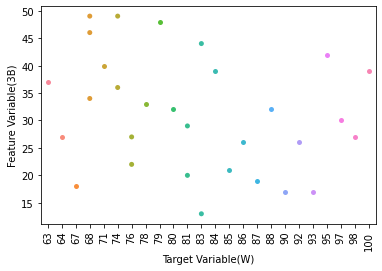



This is a Swarmplot diagram b/w attributes- W & HR
AxesSubplot(0.125,0.125;0.775x0.755)


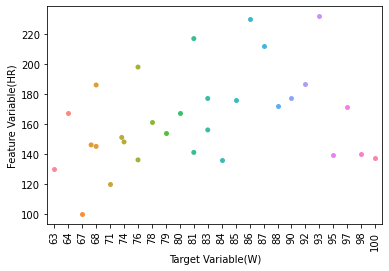



This is a Swarmplot diagram b/w attributes- W & BB
AxesSubplot(0.125,0.125;0.775x0.755)


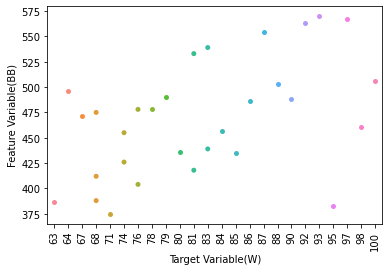



This is a Swarmplot diagram b/w attributes- W & SO
AxesSubplot(0.125,0.125;0.775x0.755)


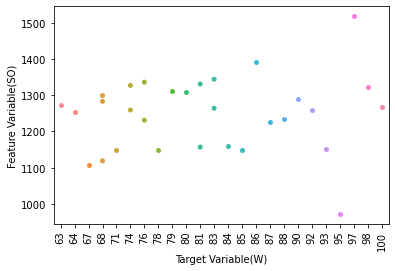



This is a Swarmplot diagram b/w attributes- W & SB
AxesSubplot(0.125,0.125;0.775x0.755)


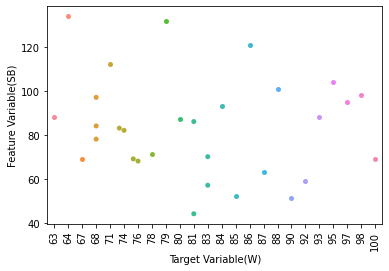



This is a Swarmplot diagram b/w attributes- W & RA
AxesSubplot(0.125,0.125;0.775x0.755)


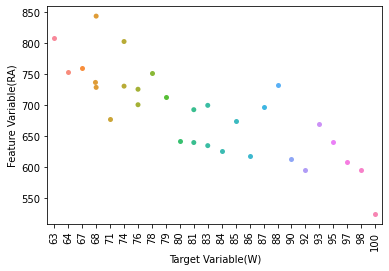



This is a Swarmplot diagram b/w attributes- W & ER
AxesSubplot(0.125,0.125;0.775x0.755)


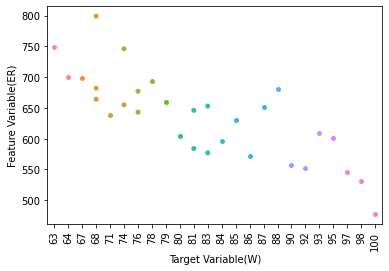



This is a Swarmplot diagram b/w attributes- W & ERA
AxesSubplot(0.125,0.125;0.775x0.755)


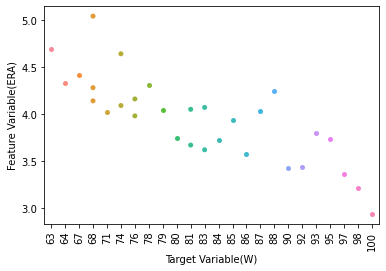



This is a Swarmplot diagram b/w attributes- W & CG
AxesSubplot(0.125,0.125;0.775x0.755)


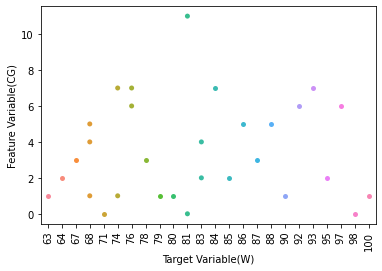



This is a Swarmplot diagram b/w attributes- W & SHO
AxesSubplot(0.125,0.125;0.775x0.755)


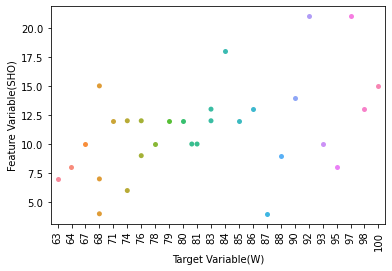



This is a Swarmplot diagram b/w attributes- W & SV
AxesSubplot(0.125,0.125;0.775x0.755)


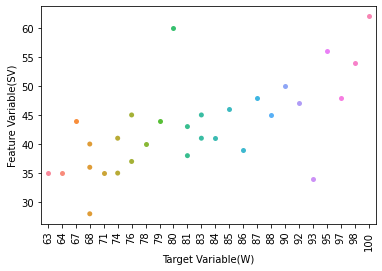



This is a Swarmplot diagram b/w attributes- W & E
AxesSubplot(0.125,0.125;0.775x0.755)


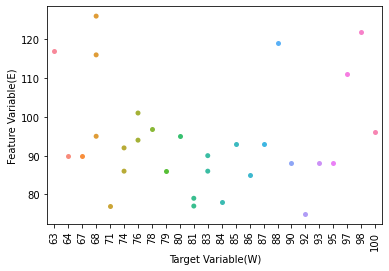

In [29]:
l=['R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','E']
for i in l:
    print(f'This is a Swarmplot diagram b/w attributes- W & {i}')
    print(sns.swarmplot(x=df.W,y=df[i]))
    plt.xlabel('Target Variable(W)')
    plt.ylabel(f'Feature Variable({i})')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

###### 8. Pairplot

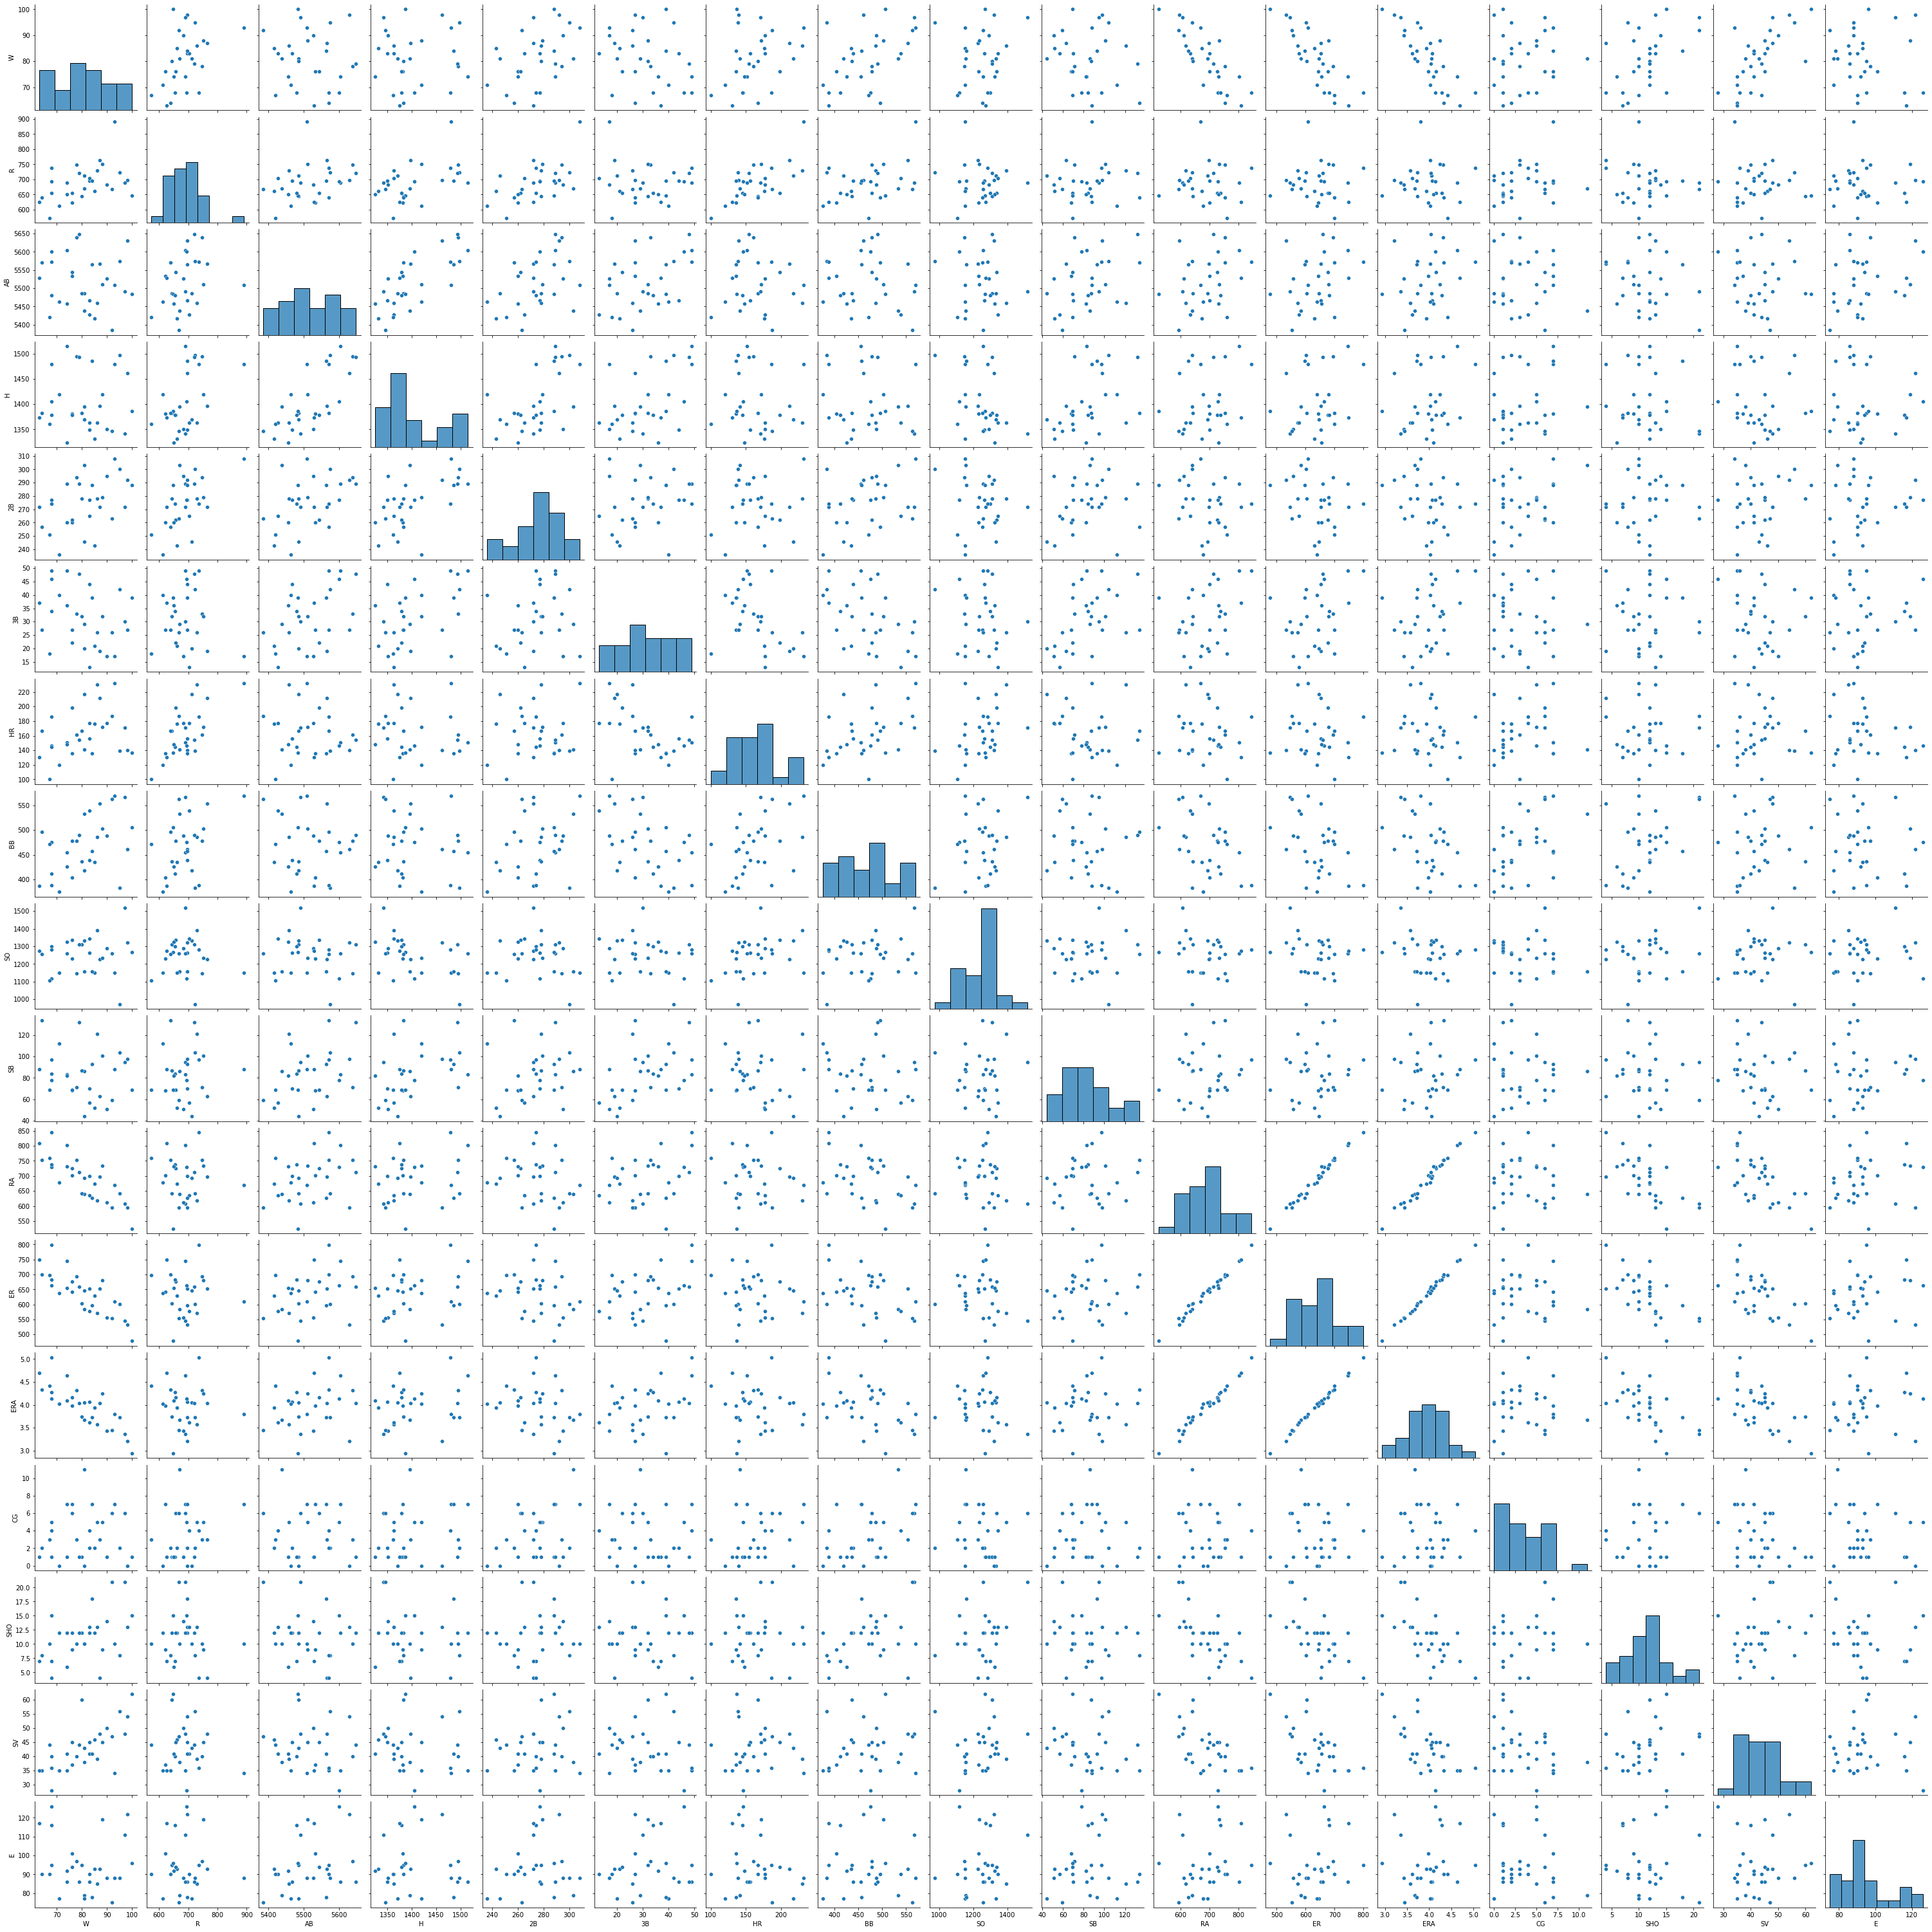

In [32]:
sns.pairplot(df)

###### There is a strong +ve correlation b/w attributes RA , ER and ERA

###### Descriptive Statistics

In [33]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [34]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
W,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
R,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
AB,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
H,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
2B,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
3B,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
HR,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
BB,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
SO,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
SB,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


###### As we can see in the above chart attribute R,2B,BB,SO,RA,ER & SHO has less mean than their respective median and also the interquartile difference for E,SV,SHO,CG,SB,SO,HR & 2B are varying too much hence there might be possibility that outliers are present in the data set. Note.I'm not going to apply statistical properties over Target variable.

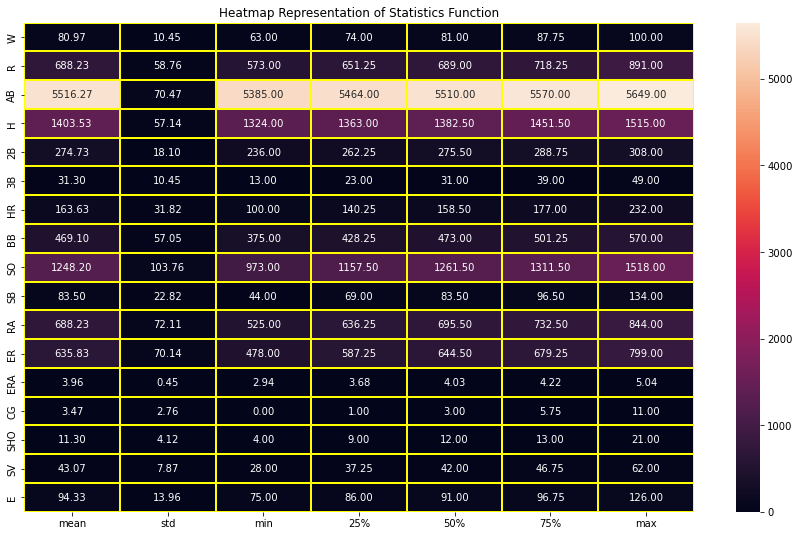

In [35]:
plt.figure(figsize=(15,9))
sns.heatmap(df.describe()[1:].T,annot=True,linecolor='yellow',linewidth='0.1',fmt='0.2f')
plt.yticks(rotation=90)
plt.title('Heatmap Representation of Statistics Function')
plt.show()

###### Correlation

In [36]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


In [37]:
df.corr().W.sort_values()

ERA   -0.819600
RA    -0.812952
ER    -0.809435
3B    -0.251118
SB    -0.157234
E     -0.089485
AB    -0.087947
H      0.037612
CG     0.080533
SO     0.111850
HR     0.307407
2B     0.427797
R      0.430751
SHO    0.471805
BB     0.484342
SV     0.666530
W      1.000000
Name: W, dtype: float64

###### see, there are 7 attributes having negative values and its showing us that there is negative correlation b/w attrition (which is our target variable) and other respective Negative attributes.Hence will remove all the negative correlated columns later in data cleaning phase.Negative correlation means if input is +ve then output is -ve and vice-versa whereas, Positive correlation means if input is +ve then output would also be +ve and vice-versa. Also we'll not remove any categorical columns in this process¶
The attributes those are giving negative correlation are given below---ERA,RA,ER,3B,SB,E,AB

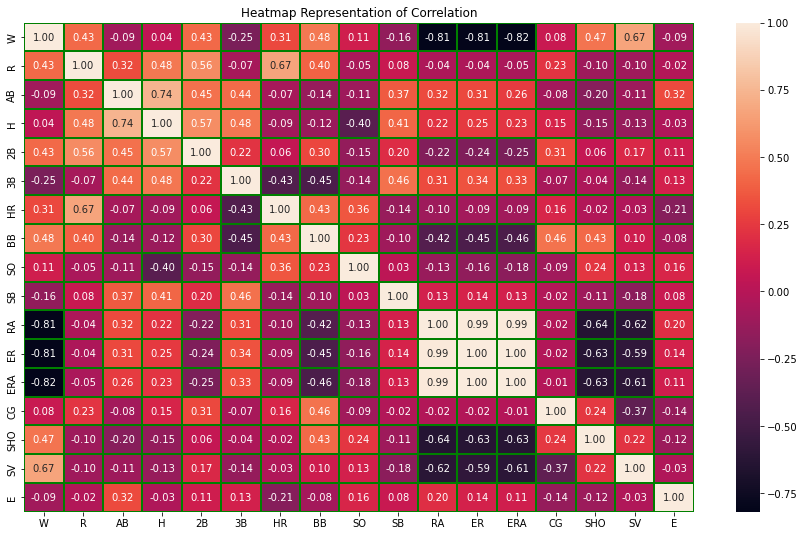

In [38]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True,linecolor='g',linewidth='0.1',fmt='0.2f')
plt.yticks(rotation=90)
plt.title('Heatmap Representation of Correlation')
plt.show()

###### Multicollinearity

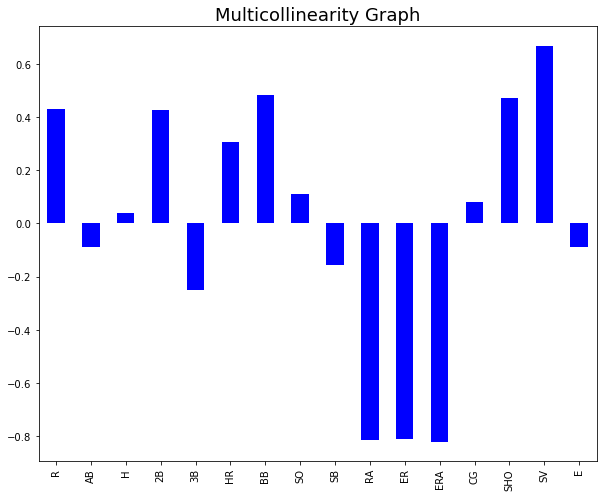

In [39]:
plt.figure(figsize=(10,8))
df.corr().W.drop(['W']).plot(kind='bar',color='b')
plt.title('Multicollinearity Graph',fontsize=18)
plt.show()

###### i'll check the multicollinearity later in the Data Cleansing portion when i'll be calculating the Variance inflation factor

##### Skewness

In [40]:
df.skew().sort_values()

2B    -0.230650
SO    -0.156065
RA     0.045734
W      0.047089
ERA    0.053331
ER     0.058710
3B     0.129502
BB     0.158498
AB     0.183437
SB     0.479893
HR     0.516441
SHO    0.565790
SV     0.657524
H      0.670254
CG     0.736845
E      0.890132
R      1.200786
dtype: float64

###### The threshold value of Skewness is +/=0.5. Attributes- SHO,SV,H,CG,E,R are not attaining the threshold value hence will remove skewness from thses columns lateron in data cleansing part,also will not touch target column and categorical columns for removing the skewness.

###### Distribution Plot
Here we can now check the normal distribution pattern for each of the attributes which are skewed left or right hand side

The Distribution Plot for attribute-W is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


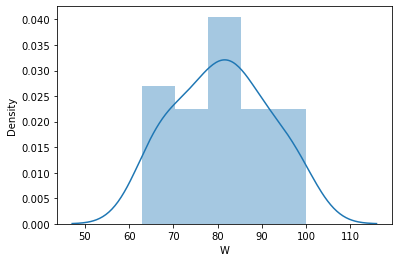



The Distribution Plot for attribute-R is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


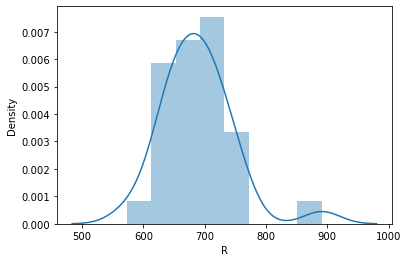



The Distribution Plot for attribute-AB is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


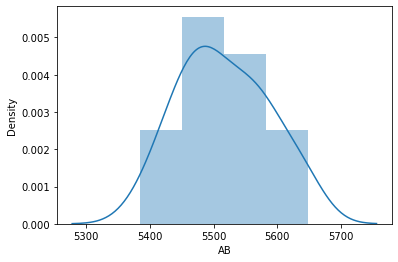



The Distribution Plot for attribute-H is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


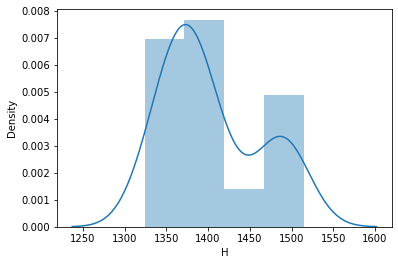



The Distribution Plot for attribute-2B is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


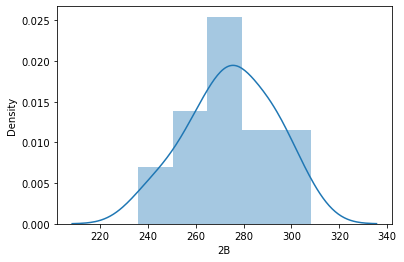



The Distribution Plot for attribute-3B is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


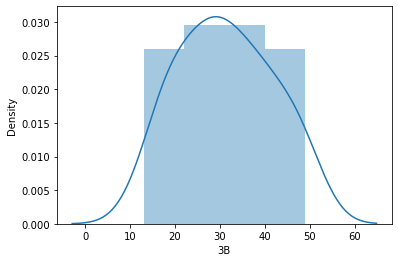



The Distribution Plot for attribute-HR is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


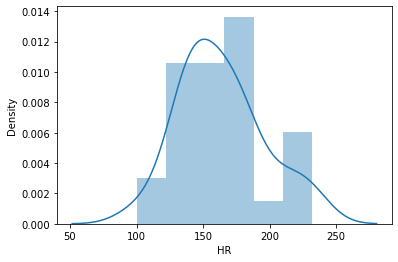



The Distribution Plot for attribute-BB is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


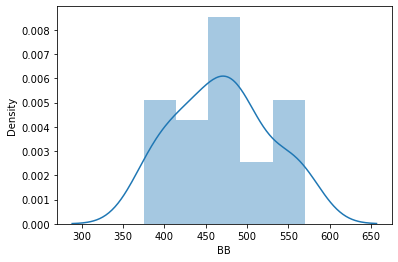



The Distribution Plot for attribute-SO is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


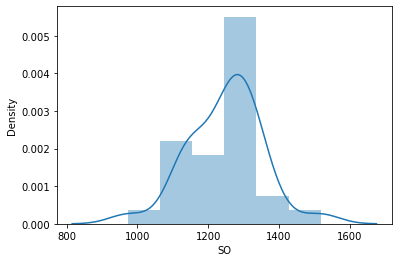



The Distribution Plot for attribute-SB is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


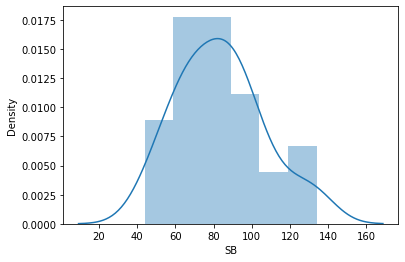



The Distribution Plot for attribute-RA is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


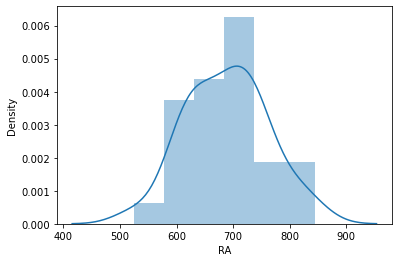



The Distribution Plot for attribute-ER is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


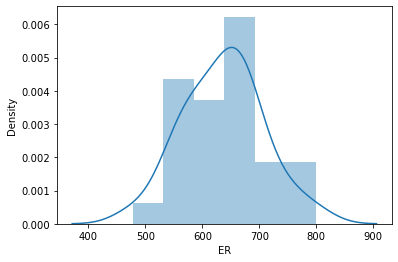



The Distribution Plot for attribute-ERA is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


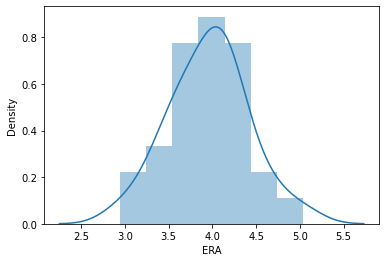



The Distribution Plot for attribute-CG is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


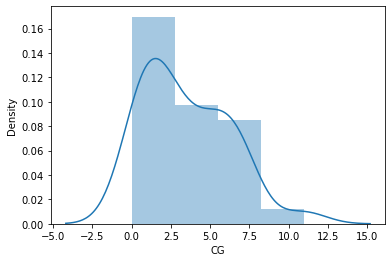



The Distribution Plot for attribute-SHO is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


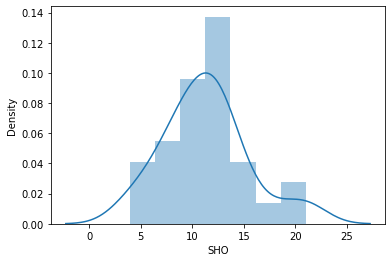



The Distribution Plot for attribute-SV is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


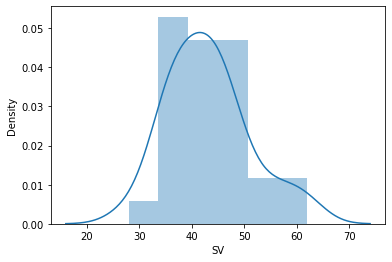



The Distribution Plot for attribute-E is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


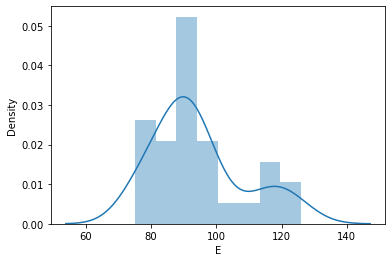

In [41]:
l=['W','R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','E']
for i in l:
    print(f'The Distribution Plot for attribute-{i} is given below..')
    print(sns.distplot(df[i]))
    plt.show()
    print('\n')

###### As we can see in the above distribution plots all of the attributes are skewed right hand side.Ergo,i'll remove the skewness later on the data cleansing section by power transfrorm or boxcox method

###### 2. Removing Multicollinearity

###### Outliers

Box plot to check the outliers

The BoxPlot Diagram for attribute-W is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


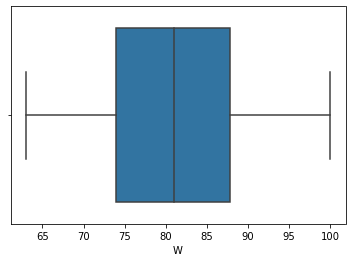



The BoxPlot Diagram for attribute-R is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


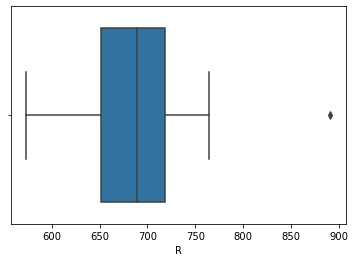



The BoxPlot Diagram for attribute-AB is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


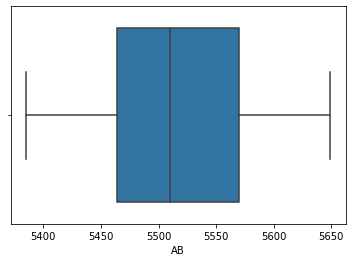



The BoxPlot Diagram for attribute-H is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


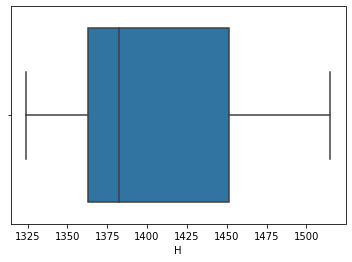



The BoxPlot Diagram for attribute-2B is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


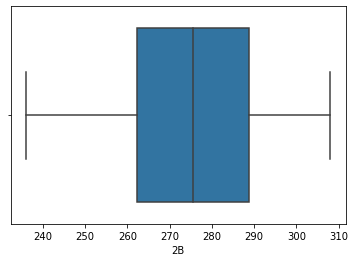



The BoxPlot Diagram for attribute-3B is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


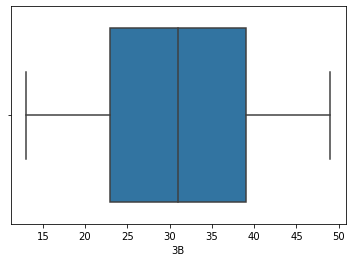



The BoxPlot Diagram for attribute-HR is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


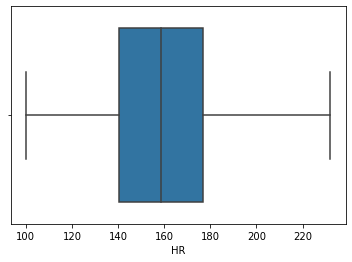



The BoxPlot Diagram for attribute-BB is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


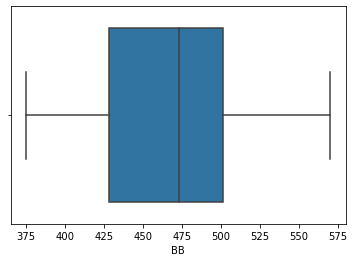



The BoxPlot Diagram for attribute-SO is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


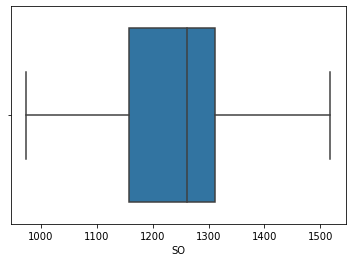



The BoxPlot Diagram for attribute-SB is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


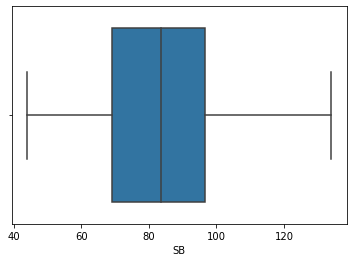



The BoxPlot Diagram for attribute-RA is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


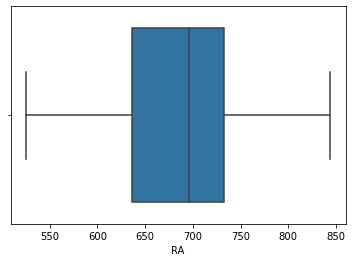



The BoxPlot Diagram for attribute-ER is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


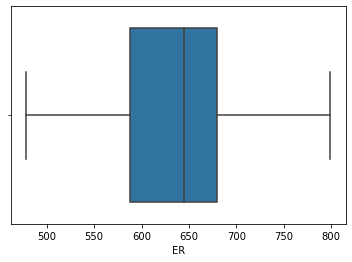



The BoxPlot Diagram for attribute-ERA is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


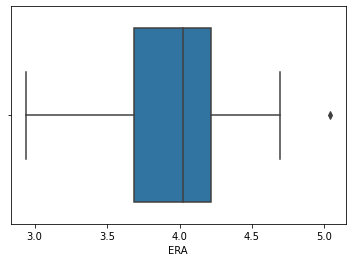



The BoxPlot Diagram for attribute-CG is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


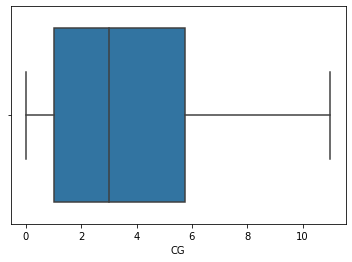



The BoxPlot Diagram for attribute-SHO is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


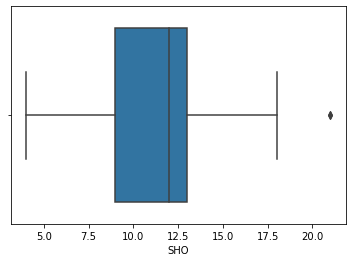



The BoxPlot Diagram for attribute-SV is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


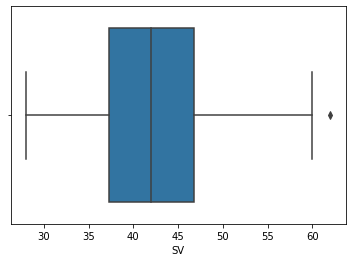



The BoxPlot Diagram for attribute-E is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


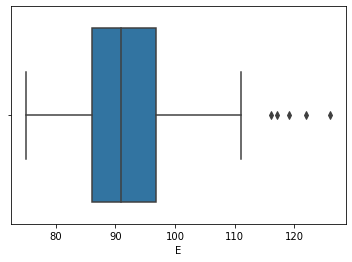

In [44]:
l=['W','R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','E']
for i in l:
    print(f'The BoxPlot Diagram for attribute-{i} is given below..')
    print(sns.boxplot(df[i]))
    plt.show()
    print('\n')

###### As we can see in the above boxplot images there might be possibility of outliers presence in attributes-R,ERA,SV,E,SHO. And,I'll remove the same in next part of data cleansing

In [45]:
z=np.abs(zscore(df))
np.where(z>3)

(array([5], dtype=int64), array([1], dtype=int64))

###### only 5th row and 1st column has an outlier presence

In [46]:
z.iloc[5]

W      1.170814
R      3.509647
AB     0.104884
H      1.361089
2B     1.869832
3B     1.391501
HR     2.185047
BB     1.798742
SO     0.952796
SB     0.200609
RA     0.257184
ER     0.389104
ERA    0.350165
CG     1.300442
SHO    0.320914
SV     1.171848
E      0.461470
Name: 5, dtype: float64

In [47]:
z.iloc[5][1]

3.5096470447193067

###### Data Cleansing
1. Remove Negative Correlation

In [48]:
df1=df.drop(['ERA','RA','ER','3B','SB','E','AB'],axis=1)
df1

,W,R,H,2B,HR,BB,SO,CG,SHO,SV
0,95,724,1497,300,139,383,973,2,8,56
1,83,696,1349,277,156,439,1264,2,12,45
2,81,669,1395,303,141,533,1157,11,10,38
3,76,622,1381,260,136,404,1231,7,9,37
4,74,689,1515,289,151,455,1259,7,12,35
5,93,891,1480,308,232,570,1151,7,10,34
6,87,764,1397,272,212,554,1227,3,4,48
7,81,713,1370,246,217,418,1331,0,10,43
8,80,644,1383,278,167,436,1310,1,12,60
9,78,748,1495,294,161,478,1148,3,10,40


##### To remove the negative collinearity i've dropped 7 columns,all were numeric. In this process we have only 10 columns remaining

2.Removing Multicollinearity

In [49]:
import scipy.stats
import statsmodels.api
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
x=df1.drop(['W'],axis=1)
x

,R,H,2B,HR,BB,SO,CG,SHO,SV
0,724,1497,300,139,383,973,2,8,56
1,696,1349,277,156,439,1264,2,12,45
2,669,1395,303,141,533,1157,11,10,38
3,622,1381,260,136,404,1231,7,9,37
4,689,1515,289,151,455,1259,7,12,35
5,891,1480,308,232,570,1151,7,10,34
6,764,1397,272,212,554,1227,3,4,48
7,713,1370,246,217,418,1331,0,10,43
8,644,1383,278,167,436,1310,1,12,60
9,748,1495,294,161,478,1148,3,10,40


In [51]:
#calculating VIF Score
def vif():
    df2=pd.DataFrame()
    df2['Features']=x.columns
    df2['VIF_Score']=[variance_inflation_factor(x.values,j) for j in range(x.shape[1])]
    print(df2)

In [52]:
vif()

  Features   VIF_Score
0        R  980.291583
1        H  624.969827
2       2B  737.472224
3       HR  134.363506
4       BB  157.346061
5       SO  197.824919
6       CG    5.709494
7      SHO   13.282944
8       SV   57.310800


In [53]:
#dropping out the 3 attributes now
df3=df1.drop(['SO','HR','CG'],axis=1)
df3

,W,R,H,2B,BB,SHO,SV
0,95,724,1497,300,383,8,56
1,83,696,1349,277,439,12,45
2,81,669,1395,303,533,10,38
3,76,622,1381,260,404,9,37
4,74,689,1515,289,455,12,35
5,93,891,1480,308,570,10,34
6,87,764,1397,272,554,4,48
7,81,713,1370,246,418,10,43
8,80,644,1383,278,436,12,60
9,78,748,1495,294,478,10,40


##### 3. Removing Outliners

In [54]:
df4=df3[(z<3).all(axis=1)]
df4

,W,R,H,2B,BB,SHO,SV
0,95,724,1497,300,383,8,56
1,83,696,1349,277,439,12,45
2,81,669,1395,303,533,10,38
3,76,622,1381,260,404,9,37
4,74,689,1515,289,455,12,35
6,87,764,1397,272,554,4,48
7,81,713,1370,246,418,10,43
8,80,644,1383,278,436,12,60
9,78,748,1495,294,478,10,40
10,88,751,1419,279,503,9,45


In [55]:
print(df3.shape)
print(df4.shape)

(30, 7)
(29, 7)


###### The new dataframe have 29 rows and 7 columns

In [56]:
Percentage_loss=(30-29)*100/30
Percentage_loss

3.3333333333333335

###### I'm getting the percentage loss is about 3% which is decent & Now we can move ahead by considering it

###### 4. Removing Skewness

###### a) Using power transform method

In [57]:
import sklearn
from sklearn.preprocessing import power_transform

In [58]:
x=df4.drop(['W'],axis=1)
x

,R,H,2B,BB,SHO,SV
0,724,1497,300,383,8,56
1,696,1349,277,439,12,45
2,669,1395,303,533,10,38
3,622,1381,260,404,9,37
4,689,1515,289,455,12,35
6,764,1397,272,554,4,48
7,713,1370,246,418,10,43
8,644,1383,278,436,12,60
9,748,1495,294,478,10,40
10,751,1419,279,503,9,45


In [59]:
x=power_transform(x)
x

array([[ 9.62543504e-01,  0.00000000e+00,  1.68518793e+00,
        -1.60519802e+00, -7.87002186e-01,  1.53275292e+00],
       [ 2.98863300e-01,  0.00000000e+00,  1.38197902e-01,
        -4.62095966e-01,  2.36736538e-01,  3.12020186e-01],
       [-3.12105130e-01,  0.00000000e+00,  1.90738550e+00,
         1.23209786e+00, -2.52844176e-01, -6.64136739e-01],
       [-1.30829774e+00,  0.00000000e+00, -8.37664770e-01,
        -1.16272085e+00, -5.13554932e-01, -8.20688859e-01],
       [ 1.37737301e-01,  0.00000000e+00,  9.11434794e-01,
        -1.55685826e-01,  2.36736538e-01, -1.14916472e+00],
       [ 1.96420873e+00,  0.00000000e+00, -1.63010220e-01,
         1.57949358e+00, -2.06403920e+00,  6.77176215e-01],
       [ 6.98145564e-01,  0.00000000e+00, -1.54263548e+00,
        -8.77216697e-01, -2.52844176e-01,  5.23253489e-02],
       [-8.52595277e-01,  0.00000000e+00,  1.99896614e-01,
        -5.20475583e-01,  2.36736538e-01,  1.90813725e+00],
       [ 1.55595108e+00,  0.00000000e+00,  1.255

In [60]:
df4.skew().sort_values()

2B    -0.335304
R     -0.215364
W      0.119013
BB     0.151193
SHO    0.526943
SV     0.627480
H      0.783772
dtype: float64

B. Boxcox method

In [61]:
l=['SV','H']
for i in l:
    df4[i]=scipy.stats.boxcox(df4[i])[0]
    
df4.skew().sort_values()

2B    -0.335304
R     -0.215364
SV    -0.000857
H      0.000000
W      0.119013
BB     0.151193
SHO    0.526943
dtype: float64

###### As,we can see that skewness is fully removed now and our data is almost normally distributed but going forward will need to transform this data in b/w 0 & 1 and also we have to attain the mean=0 and standard deviation =+/-1 for this will use Standard Scaler techinque

AxesSubplot(0.125,0.125;0.775x0.755)


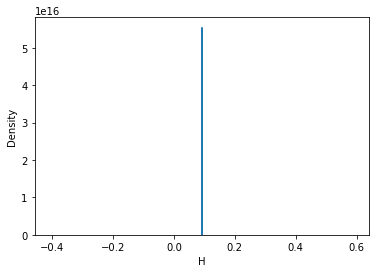

In [62]:
print(sns.distplot(df4['H']))

###### Using Standard Scalar

In [63]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x=sc.fit_transform(x)
x

array([[ 9.62543504e-01,  0.00000000e+00,  1.68518793e+00,
        -1.60519802e+00, -7.87002186e-01,  1.53275292e+00],
       [ 2.98863300e-01,  0.00000000e+00,  1.38197902e-01,
        -4.62095966e-01,  2.36736538e-01,  3.12020186e-01],
       [-3.12105130e-01,  0.00000000e+00,  1.90738550e+00,
         1.23209786e+00, -2.52844176e-01, -6.64136739e-01],
       [-1.30829774e+00,  0.00000000e+00, -8.37664770e-01,
        -1.16272085e+00, -5.13554932e-01, -8.20688859e-01],
       [ 1.37737301e-01,  0.00000000e+00,  9.11434794e-01,
        -1.55685826e-01,  2.36736538e-01, -1.14916472e+00],
       [ 1.96420873e+00,  0.00000000e+00, -1.63010220e-01,
         1.57949358e+00, -2.06403920e+00,  6.77176215e-01],
       [ 6.98145564e-01,  0.00000000e+00, -1.54263548e+00,
        -8.77216697e-01, -2.52844176e-01,  5.23253489e-02],
       [-8.52595277e-01,  0.00000000e+00,  1.99896614e-01,
        -5.20475583e-01,  2.36736538e-01,  1.90813725e+00],
       [ 1.55595108e+00,  0.00000000e+00,  1.255

In [64]:
x.shape

(29, 6)

In [65]:
x.mean()

1.1485065771984378e-17

In [66]:
x.std()

0.9128709291752769

<AxesSubplot:ylabel='Density'>

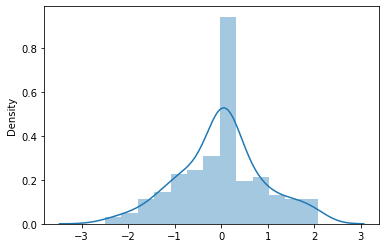

In [67]:
sns.distplot(x)

###### Now,almost our features is normally distributed as we have got the mean almost as zero and standard deviation=1 i.e. data is fully transformed in b/w 0-1

In [68]:
y=df4.W
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [69]:
y.shape

(29,)

###### Training_Testing Phase
I am going to train 80% of the data and testing size would be 20%
first will try to find out the best value for random_state

In [70]:
#importing machine learning libraries for regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
lr=LinearRegression()

In [71]:
#will finding best value of random_state
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    train_pred=lr.predict(x_train)
    test_pred=lr.predict(x_test)
    if(r2_score(train_pred,y_train))==(r2_score(test_pred,y_test)):
        print(f'At Random_State {i} the training accuracy and testing accuracy both are same')
        print(f'Training Accuracy is {r2_score(train_pred,y_train)}')
        print(f'Testing Accuracy is {r2_score(test_pred,y_test)}')
        print(f'The Mean Absolute Error is(MAE)- {mean_absolute_error(test_pred,y_test)}')
        print(f'The Mean Squared Error is(MSE)- {mean_squared_error(test_pred,y_test)}')
        print(f'The Root Mean Squared Error(RMSE) is- {np.sqrt(mean_squared_error(test_pred,y_test))}')
        print('\n')
    else:
        print(f'At Random_State {i} the training accuracy and testing accuracy both are not same')
        print(f'Training Accuracy is {r2_score(train_pred,y_train)}')
        print(f'Testing Accuracy is {r2_score(test_pred,y_test)}')
        print(f'\nThe Mean Absolute Error is (MAE)- {mean_absolute_error(test_pred,y_test)}')
        print(f'The Mean Squared Error is (MSE)- {mean_squared_error(test_pred,y_test)}')
        print(f'The Root Mean Squared Error is (RMSE)- {np.sqrt(mean_squared_error(test_pred,y_test))}')
        print('\n')

At Random_State 0 the training accuracy and testing accuracy both are not same
Training Accuracy is 0.7811358430167058
Testing Accuracy is 0.8100382440364219

The Mean Absolute Error is (MAE)- 2.443215956892447
The Mean Squared Error is (MSE)- 13.9039593062392
The Root Mean Squared Error is (RMSE)- 3.7288013229775596


At Random_State 1 the training accuracy and testing accuracy both are not same
Training Accuracy is 0.7347328532668342
Testing Accuracy is 0.8994768499723946

The Mean Absolute Error is (MAE)- 2.7275947567152556
The Mean Squared Error is (MSE)- 11.357551577003221
The Root Mean Squared Error is (RMSE)- 3.3700966717593164


At Random_State 2 the training accuracy and testing accuracy both are not same
Training Accuracy is 0.7318826621733991
Testing Accuracy is -0.48170406190498816

The Mean Absolute Error is (MAE)- 3.0124228774058133
The Mean Squared Error is (MSE)- 19.85439385272065
The Root Mean Squared Error is (RMSE)- 4.455826954979361


At Random_State 3 the training 

###### At random_state 20 i'm getting training and testing score of accuracy as equal and the RMSEerror is 3, which indiactes that everything is going good with this model,now what i'll do is- will findout the CV Score to generalize the model so that model's training and testing accuracy can be acheive maximum. Let's find out CV Score of each model in the next part

###### Linear Regression Best Fitted line

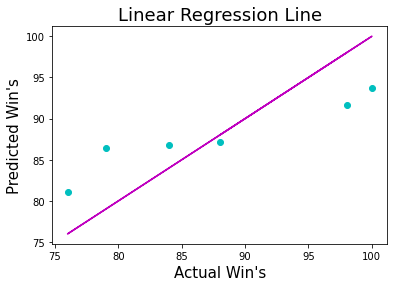

In [72]:
plt.scatter(y_test,test_pred,color='c')
plt.plot(y_test,y_test,color='m')
plt.xlabel("Actual Win's",fontsize=15)
plt.ylabel("Predicted Win's",fontsize=15)
plt.title("Linear Regression Line",fontsize=18)
plt.show()

###### As, we can see that our model is getting the best fitted line as its covering more data points over the line itself.and the RMSE error is less too as the distance b/w the original and predicted data points are less and that indicates model accuracy is good enough while making prediction

###### Find out CV Score

In [73]:
from sklearn.model_selection import cross_val_score

In [74]:
for n in range(2,10):
    cvscore=cross_val_score(lr,x,y,cv=n)
    mean=cvscore.mean()
    std=cvscore.std()
    print(f'At K-Fold {n} The CV Score Linear Regression Model is {mean*100} and Standard Deviation is {std}')
    print('\n')

At K-Fold 2 The CV Score Linear Regression Model is 38.65257773506061 and Standard Deviation is 0.34145704868666193


At K-Fold 3 The CV Score Linear Regression Model is 40.980321806710215 and Standard Deviation is 0.5484809816116188


At K-Fold 4 The CV Score Linear Regression Model is 45.68534014499757 and Standard Deviation is 0.6354211930026156


At K-Fold 5 The CV Score Linear Regression Model is 8.647561789343547 and Standard Deviation is 1.067795613673821


At K-Fold 6 The CV Score Linear Regression Model is 12.403857351066529 and Standard Deviation is 1.0886733491987748


At K-Fold 7 The CV Score Linear Regression Model is -13.332973933076433 and Standard Deviation is 1.6620894189599777


At K-Fold 8 The CV Score Linear Regression Model is 10.032377313910088 and Standard Deviation is 0.8368878662116259


At K-Fold 9 The CV Score Linear Regression Model is -347.5221744108557 and Standard Deviation is 10.249103939527743




In [75]:
#importing other libraries
from sklearn.linear_model import Lasso,Ridge,ElasticNet,SGDRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
ls=Lasso()
rd=Ridge()
sgd=SGDRegressor()
en=ElasticNet()
rf=RandomForestRegressor()
ad=AdaBoostRegressor()
grd=GradientBoostingRegressor()

In [76]:
#creating a definition to expand the model individually
def model(m,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)
    m.fit(x_train,y_train)
    train_pred=m.predict(x_train)
    test_pred=m.predict(x_test)
    print(f'Training Accuracy of model {m} is {r2_score(train_pred,y_train)}')
    print(f'Testing Accuracy of model {m} is {r2_score(test_pred,y_test)}')
    print('\nError in the model is calculated below-\n')
    print(f'The Mean Absolute Error is (MAE)- {mean_absolute_error(test_pred,y_test)}')
    print(f'The Mean Squared Error is (MSE)- {mean_squared_error(test_pred,y_test)}')
    print(f'The Root Mean Squared Error is (RMSE)- {np.sqrt(mean_squared_error(test_pred,y_test))}')
    print('\n')
    print('Finding out the best K-Fold Value')
    print('\n\t')
    for j in range(2,10):
        cvs=cross_val_score(m,x,y,cv=j)
        cvs.mean()
        cvs.std()
        print(f'At K-Fold {j} the CV Score of model {m} is {cvs.mean()*100} & std is {cvs.std()}')
        print('\n')

In [77]:
#1st model
model(lr,x,y)

Training Accuracy of model LinearRegression() is 0.7795055184615218
Testing Accuracy of model LinearRegression() is 0.7665193928289448

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 2.547405707587435
The Mean Squared Error is (MSE)- 8.541372493695583
The Root Mean Squared Error is (RMSE)- 2.9225626586431956


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model LinearRegression() is 38.65257773506061 & std is 0.34145704868666193


At K-Fold 3 the CV Score of model LinearRegression() is 40.980321806710215 & std is 0.5484809816116188


At K-Fold 4 the CV Score of model LinearRegression() is 45.68534014499757 & std is 0.6354211930026156


At K-Fold 5 the CV Score of model LinearRegression() is 8.647561789343547 & std is 1.067795613673821


At K-Fold 6 the CV Score of model LinearRegression() is 12.403857351066529 & std is 1.0886733491987748


At K-Fold 7 the CV Score of model LinearRegression() is -13.332973933076433 & std is 1.66208941895997

In [78]:
#2nd model
model(rd,x,y)

Training Accuracy of model Ridge() is 0.7637717072863528
Testing Accuracy of model Ridge() is 0.7261170581430992

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 2.728284810370693
The Mean Squared Error is (MSE)- 9.17103722695027
The Root Mean Squared Error is (RMSE)- 3.028372042360428


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model Ridge() is 59.46543507617077 & std is 0.07116990080722624


At K-Fold 3 the CV Score of model Ridge() is 50.141027250084214 & std is 0.4028784215012082


At K-Fold 4 the CV Score of model Ridge() is 54.4488234563897 & std is 0.4619966925349804


At K-Fold 5 the CV Score of model Ridge() is 12.645688929349285 & std is 1.0211937341124824


At K-Fold 6 the CV Score of model Ridge() is 18.36817311819662 & std is 1.0012354080891603


At K-Fold 7 the CV Score of model Ridge() is -6.9622673325223 & std is 1.5289364665570742


At K-Fold 8 the CV Score of model Ridge() is 13.496033125459434 & std is 0.7696092250652

In [79]:
#3rd model
model(sgd,x,y)

Training Accuracy of model SGDRegressor() is 0.7789242302433974
Testing Accuracy of model SGDRegressor() is 0.7887228109490796

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 2.318515418006754
The Mean Squared Error is (MSE)- 8.153971981791345
The Root Mean Squared Error is (RMSE)- 2.8555160622541322


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model SGDRegressor() is 57.092083120541815 & std is 0.20198522353270726


At K-Fold 3 the CV Score of model SGDRegressor() is 44.24472545077635 & std is 0.49270016877947437


At K-Fold 4 the CV Score of model SGDRegressor() is 51.87419483620038 & std is 0.5382001930506937


At K-Fold 5 the CV Score of model SGDRegressor() is 6.149323733455212 & std is 1.106805794658321


At K-Fold 6 the CV Score of model SGDRegressor() is 4.714919655294064 & std is 1.2563233227293022


At K-Fold 7 the CV Score of model SGDRegressor() is -18.200384626100178 & std is 1.7574175118005273


At K-Fold 8 the CV Score of

In [80]:
#4th model
model(en,x,y)

Training Accuracy of model ElasticNet() is 0.3276411628168575
Testing Accuracy of model ElasticNet() is -0.4535601187711864

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 4.183486789264957
The Mean Squared Error is (MSE)- 21.80292633633432
The Root Mean Squared Error is (RMSE)- 4.66936037764642


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model ElasticNet() is 39.44072309740877 & std is 0.018718335443220213


At K-Fold 3 the CV Score of model ElasticNet() is 45.79943633584633 & std is 0.15438529268318146


At K-Fold 4 the CV Score of model ElasticNet() is 52.00974593219156 & std is 0.16030979474630594


At K-Fold 5 the CV Score of model ElasticNet() is 14.531168064468108 & std is 0.6997057894259952


At K-Fold 6 the CV Score of model ElasticNet() is 31.359988536860012 & std is 0.5513835809031999


At K-Fold 7 the CV Score of model ElasticNet() is 9.904273057941195 & std is 0.7549531994186975


At K-Fold 8 the CV Score of model ElasticN

In [81]:
#5th model
model(rf,x,y)

Training Accuracy of model RandomForestRegressor() is 0.9064385261307774
Testing Accuracy of model RandomForestRegressor() is -6.6954330253077865

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 7.136666666666668
The Mean Squared Error is (MSE)- 61.47693333333336
The Root Mean Squared Error is (RMSE)- 7.840722755800855


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model RandomForestRegressor() is 2.4475929236660865 & std is 0.31618394587225584


At K-Fold 3 the CV Score of model RandomForestRegressor() is 33.612238039043625 & std is 0.33267211049477485


At K-Fold 4 the CV Score of model RandomForestRegressor() is 52.02998921422874 & std is 0.1731880736678557


At K-Fold 5 the CV Score of model RandomForestRegressor() is -36.79552534810938 & std is 1.744187826330295


At K-Fold 6 the CV Score of model RandomForestRegressor() is 17.539593680181568 & std is 0.7710608539116077


At K-Fold 7 the CV Score of model RandomForestRegressor() is -2

In [82]:
#6th model
model(ad,x,y)

Training Accuracy of model AdaBoostRegressor() is 0.9833598367282649
Testing Accuracy of model AdaBoostRegressor() is -23.354357189214685

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 7.986111111111112
The Mean Squared Error is (MSE)- 79.62615740740742
The Root Mean Squared Error is (RMSE)- 8.923349001770996


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model AdaBoostRegressor() is -4.164121396268245 & std is 0.3416183228220591


At K-Fold 3 the CV Score of model AdaBoostRegressor() is 7.211524006509384 & std is 0.5514570572306574


At K-Fold 4 the CV Score of model AdaBoostRegressor() is 26.181421213210974 & std is 0.48137594585422544


At K-Fold 5 the CV Score of model AdaBoostRegressor() is -37.424420984206066 & std is 1.5400281292738445


At K-Fold 6 the CV Score of model AdaBoostRegressor() is -14.08113463133086 & std is 1.3170772725551907


At K-Fold 7 the CV Score of model AdaBoostRegressor() is -69.19496748319052 & std is 2.487

In [83]:
#7th model
model(grd,x,y)

Training Accuracy of model GradientBoostingRegressor() is 0.9999964931688852
Testing Accuracy of model GradientBoostingRegressor() is -6.646456618055557

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 7.288183830297027
The Mean Squared Error is (MSE)- 65.32475398229828
The Root Mean Squared Error is (RMSE)- 8.082373041520558


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model GradientBoostingRegressor() is -16.340756140813035 & std is 0.663140583792132


At K-Fold 3 the CV Score of model GradientBoostingRegressor() is -19.330645952302195 & std is 1.0968382207554404


At K-Fold 4 the CV Score of model GradientBoostingRegressor() is 24.547650208357553 & std is 0.6561915935698331


At K-Fold 5 the CV Score of model GradientBoostingRegressor() is -84.45044617540664 & std is 2.1627204312537422


At K-Fold 6 the CV Score of model GradientBoostingRegressor() is -66.86962182075318 & std is 2.0917076324581734


At K-Fold 7 the CV Score of model G

In [84]:
#8th model
model(ls,x,y)

Training Accuracy of model Lasso() is 0.6519797938622213
Testing Accuracy of model Lasso() is 0.5867163712366867

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 3.0710227445520744
The Mean Squared Error is (MSE)- 12.02974980813462
The Root Mean Squared Error is (RMSE)- 3.468392971987837


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model Lasso() is 49.52296353706283 & std is 0.05773643777033538


At K-Fold 3 the CV Score of model Lasso() is 48.70804200894707 & std is 0.282900624542024


At K-Fold 4 the CV Score of model Lasso() is 55.55419322467503 & std is 0.30925870206580713


At K-Fold 5 the CV Score of model Lasso() is 7.226238122304932 & std is 0.9712677384181723


At K-Fold 6 the CV Score of model Lasso() is 25.139095269210543 & std is 0.8809501001964051


At K-Fold 7 the CV Score of model Lasso() is -1.2252347366347172 & std is 1.303384991481268


At K-Fold 8 the CV Score of model Lasso() is 19.55384203536375 & std is 0.6307980170

###### Hyper Parameter Tuning
To make the model more accurate by providing their best parameters

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
#Here i have created 7 Models parameters
dict_ls={'alpha':[.0001,.001,.01,.1,1,10],'selection':['cyclic', 'random']}
dict_rd={'alpha':[.0001,.001,.01,.1,1,10],'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg','sag', 'saga', 'lbfgs']}
dict_en={'alpha':[.0001,.001,.01,.1,1,10],'selection':['cyclic', 'random']}
dict_rf={'criterion' : ["squared_error", "absolute_error", "poisson"],'max_features':["sqrt", "log2", None]}
dict_ad={'loss':['linear', 'square', 'exponential']}
dict_grd={'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],'criterion':['friedman_mse', 'squared_error', 'mse'],'max_features':['auto', 'sqrt', 'log2']}
dict_sgd={'alpha':[.0001,.001,.01,.1,1,10],'penalty':['l2', 'l1', 'elasticnet'],'learning_rate':['constant', 'optimal', 'invscaling','adaptive']}

In [87]:
#Now I'm defining a function so that i can individuallay let the model perfom and give the best parameter out of it.
def Hyper_Parameter_Tuning(machine,dictionary):
    grd=GridSearchCV(machine,dictionary)
    grd.fit(x,y)
    print(f'The best Parameters of the model {machine} are {grd.best_params_}')

In [88]:
Hyper_Parameter_Tuning(ls,dict_ls)

The best Parameters of the model Lasso() are {'alpha': 0.1, 'selection': 'cyclic'}


In [89]:
Hyper_Parameter_Tuning(rd,dict_rd)

The best Parameters of the model Ridge() are {'alpha': 10, 'solver': 'lsqr'}


In [90]:
Hyper_Parameter_Tuning(en,dict_en)

The best Parameters of the model ElasticNet() are {'alpha': 1, 'selection': 'random'}


In [91]:
Hyper_Parameter_Tuning(rf,dict_rf)

The best Parameters of the model RandomForestRegressor() are {'criterion': 'squared_error', 'max_features': 'log2'}


In [92]:
Hyper_Parameter_Tuning(ad,dict_ad)

The best Parameters of the model AdaBoostRegressor() are {'loss': 'exponential'}


In [93]:
Hyper_Parameter_Tuning(grd,dict_grd)

The best Parameters of the model GradientBoostingRegressor() are {'criterion': 'squared_error', 'loss': 'squared_error', 'max_features': 'log2'}


In [94]:
Hyper_Parameter_Tuning(sgd,dict_sgd)

The best Parameters of the model SGDRegressor() are {'alpha': 0.1, 'learning_rate': 'optimal', 'penalty': 'l2'}


In [95]:
#Redefining the models after getting the parameters
ls=Lasso(alpha=0.1,selection='cyclic')
rd=Ridge(alpha=10,solver='saga')
en=ElasticNet(alpha=0.1,selection='random')
rf=RandomForestRegressor(criterion='squared_error',max_features='log2')
ad=AdaBoostRegressor(loss='linear')
grd=GradientBoostingRegressor(criterion='squared_error',loss='huber',max_features='log2')
sgd=SGDRegressor(alpha=1,learning_rate='optimal',penalty='elasticnet')

In [96]:
#model_1
model(lr,x,y)

Training Accuracy of model LinearRegression() is 0.7795055184615218
Testing Accuracy of model LinearRegression() is 0.7665193928289448

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 2.547405707587435
The Mean Squared Error is (MSE)- 8.541372493695583
The Root Mean Squared Error is (RMSE)- 2.9225626586431956


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model LinearRegression() is 38.65257773506061 & std is 0.34145704868666193


At K-Fold 3 the CV Score of model LinearRegression() is 40.980321806710215 & std is 0.5484809816116188


At K-Fold 4 the CV Score of model LinearRegression() is 45.68534014499757 & std is 0.6354211930026156


At K-Fold 5 the CV Score of model LinearRegression() is 8.647561789343547 & std is 1.067795613673821


At K-Fold 6 the CV Score of model LinearRegression() is 12.403857351066529 & std is 1.0886733491987748


At K-Fold 7 the CV Score of model LinearRegression() is -13.332973933076433 & std is 1.66208941895997

In [97]:
#model_2
model(ls,x,y)

Training Accuracy of model Lasso(alpha=0.1) is 0.772088541243043
Testing Accuracy of model Lasso(alpha=0.1) is 0.7533196397184855

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 2.599583206428458
The Mean Squared Error is (MSE)- 8.825813539075236
The Root Mean Squared Error is (RMSE)- 2.9708270799686805


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model Lasso(alpha=0.1) is 47.92229568491465 & std is 0.18932414661588381


At K-Fold 3 the CV Score of model Lasso(alpha=0.1) is 47.15383494637954 & std is 0.4571076598930212


At K-Fold 4 the CV Score of model Lasso(alpha=0.1) is 52.05954798803406 & std is 0.5194169326600806


At K-Fold 5 the CV Score of model Lasso(alpha=0.1) is 10.355679092030467 & std is 1.0572538906331446


At K-Fold 6 the CV Score of model Lasso(alpha=0.1) is 18.3946669816521 & std is 0.9993515911564878


At K-Fold 7 the CV Score of model Lasso(alpha=0.1) is -7.221488852761659 & std is 1.5439226130323107


At K-Fold 8 th

In [98]:
#model_3
model(rd,x,y)

Training Accuracy of model Ridge(alpha=10, solver='saga') is 0.5373693005811835
Testing Accuracy of model Ridge(alpha=10, solver='saga') is 0.03356346761457696

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 3.839550596932277
The Mean Squared Error is (MSE)- 18.007842180589318
The Root Mean Squared Error is (RMSE)- 4.2435647963227


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model Ridge(alpha=10, solver='saga') is 39.33192062583747 & std is 0.003100464627528776


At K-Fold 3 the CV Score of model Ridge(alpha=10, solver='saga') is 51.7456964154338 & std is 0.1806695679347376


At K-Fold 4 the CV Score of model Ridge(alpha=10, solver='saga') is 57.44832566651821 & std is 0.18853441049042732


At K-Fold 5 the CV Score of model Ridge(alpha=10, solver='saga') is 18.86461065798903 & std is 0.7871291211227356


At K-Fold 6 the CV Score of model Ridge(alpha=10, solver='saga') is 34.457299671081465 & std is 0.6083967082705459


At K-Fold 7 the C

In [99]:
#model_4
model(en,x,y)

Training Accuracy of model ElasticNet(alpha=0.1, selection='random') is 0.7567613838735865
Testing Accuracy of model ElasticNet(alpha=0.1, selection='random') is 0.7112942225607575

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 2.7795166683433385
The Mean Squared Error is (MSE)- 9.43640528010794
The Root Mean Squared Error is (RMSE)- 3.0718732526111716


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model ElasticNet(alpha=0.1, selection='random') is 57.90518781590534 & std is 0.0732769911096624


At K-Fold 3 the CV Score of model ElasticNet(alpha=0.1, selection='random') is 51.64139453409797 & std is 0.3791182859244987


At K-Fold 4 the CV Score of model ElasticNet(alpha=0.1, selection='random') is 56.52868667423435 & std is 0.41955389577073876


At K-Fold 5 the CV Score of model ElasticNet(alpha=0.1, selection='random') is 13.648738904295865 & std is 1.0098523197576084


At K-Fold 6 the CV Score of model ElasticNet(alpha=0.1, selection='

In [100]:
#model_5
model(rf,x,y)

Training Accuracy of model RandomForestRegressor(max_features='log2') is 0.9242491528382071
Testing Accuracy of model RandomForestRegressor(max_features='log2') is -5.388511734868516

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 5.748333333333332
The Mean Squared Error is (MSE)- 53.76218333333332
The Root Mean Squared Error is (RMSE)- 7.332269998665715


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model RandomForestRegressor(max_features='log2') is -3.6196887671146483 & std is 0.1232808478802665


At K-Fold 3 the CV Score of model RandomForestRegressor(max_features='log2') is 27.69326419772388 & std is 0.27516137207459124


At K-Fold 4 the CV Score of model RandomForestRegressor(max_features='log2') is 38.674739459281994 & std is 0.21671585530747028


At K-Fold 5 the CV Score of model RandomForestRegressor(max_features='log2') is -10.543395905843663 & std is 0.8806969487829512


At K-Fold 6 the CV Score of model RandomForestRegressor(m

In [101]:
#model_6
model(ad,x,y)

Training Accuracy of model AdaBoostRegressor() is 0.98388845938434
Testing Accuracy of model AdaBoostRegressor() is -19.474584830533203

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 7.525000000000001
The Mean Squared Error is (MSE)- 73.20375000000003
The Root Mean Squared Error is (RMSE)- 8.555919003824195


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model AdaBoostRegressor() is 0.7716499267067078 & std is 0.2241943423762025


At K-Fold 3 the CV Score of model AdaBoostRegressor() is 15.982758307077274 & std is 0.5840462378503105


At K-Fold 4 the CV Score of model AdaBoostRegressor() is 47.41541505973691 & std is 0.2856335281412643


At K-Fold 5 the CV Score of model AdaBoostRegressor() is -18.37360931129295 & std is 1.2484490569744773


At K-Fold 6 the CV Score of model AdaBoostRegressor() is -31.134685088468217 & std is 1.7650265056399705


At K-Fold 7 the CV Score of model AdaBoostRegressor() is -90.23265882976321 & std is 2.979048

In [102]:
#model_7
model(grd,x,y)

Training Accuracy of model GradientBoostingRegressor(criterion='squared_error', loss='huber',
                          max_features='log2') is 0.9997373059312372
Testing Accuracy of model GradientBoostingRegressor(criterion='squared_error', loss='huber',
                          max_features='log2') is -4.449615930496317

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 7.149949935524337
The Mean Squared Error is (MSE)- 74.39053436753257
The Root Mean Squared Error is (RMSE)- 8.624994745942317


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model GradientBoostingRegressor(criterion='squared_error', loss='huber',
                          max_features='log2') is -22.496454793381332 & std is 0.2538480292498145


At K-Fold 3 the CV Score of model GradientBoostingRegressor(criterion='squared_error', loss='huber',
                          max_features='log2') is 6.5817024446001415 & std is 0.6033273068119479


At K-Fold 4 the CV Score of model

In [103]:
#model_8
model(sgd,x,y)

Training Accuracy of model SGDRegressor(alpha=1, learning_rate='optimal', penalty='elasticnet') is 0.1510449014371874
Testing Accuracy of model SGDRegressor(alpha=1, learning_rate='optimal', penalty='elasticnet') is -0.6389753131474813

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 4.164045449654755
The Mean Squared Error is (MSE)- 21.24952102613832
The Root Mean Squared Error is (RMSE)- 4.6097202763441425


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model SGDRegressor(alpha=1, learning_rate='optimal', penalty='elasticnet') is 33.44160431382119 & std is 0.032503491780315696


At K-Fold 3 the CV Score of model SGDRegressor(alpha=1, learning_rate='optimal', penalty='elasticnet') is 46.54289955289636 & std is 0.058200250439806894


At K-Fold 4 the CV Score of model SGDRegressor(alpha=1, learning_rate='optimal', penalty='elasticnet') is 48.142103705459895 & std is 0.1521444879135653


At K-Fold 5 the CV Score of model SGDRegressor(alpha=1,

###### So,After working on all the 8 differents models what I would like to conclude is that Training Accuracy of model Lasso is 78% and Testing Accuracy of model Lasso is 80% is better than all the present models because it's giving less RMSE error as 2.90 which is less as compare to that of other models,Also the CV score is 47% which is ok as there are not that much rows are present for making prediction.
The second best model was Linear Regression as it's Training Accuracy is 79% & Testing Accuracy of model LinearRegression() is 80% and the Root Mean Squared Error is (RMSE)- 3.0310608231730165 which is more than same of Lasso model that's why I've choosen the lasso model over the Linear Regression Model.
As we can see that the RandomForestRegression Model was not preferable at all as its giving negative accuracy and the reason of the getting the same is simple as Random Forest method needs to perform on Big data having lots of rows and columns.

###### Saving the best model

In [104]:
import joblib

1st Model Lasso

In [105]:
file='Lasso.obj'
joblib.dump(ls,file)

['Lasso.obj']

###### Loading the Model

In [106]:
a=joblib.load(file)
a

Lasso(alpha=0.1)

###### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [107]:
#making prediction by saved model
pred=a.predict(x_test)
pred

array([92.54538523, 81.54318712, 86.44728671, 86.51939599, 95.21254275,
       87.00552559])

In [108]:
Testing_Accuracy=r2_score(y_test,pred)
Testing_Accuracy

0.6976258374248809

In [109]:
conclusion=pd.DataFrame(a.predict(x_test),y_test)
conclusion

,0
W,
98,92.545385
76,81.543187
79,86.447287
84,86.519396
100,95.212543
88,87.005526


###### As we can see that prediction of Wins in the second columns is almost same as that of original value.
OR

In [110]:
conclusion=pd.DataFrame([a.predict(x_test),y_test],index=['Predicted Win','Orginial Win'])
conclusion

,0,1,2,3,4,5
Predicted Win,92.545385,81.543187,86.447287,86.519396,95.212543,87.005526
Orginial Win,98.000000,76.000000,79.000000,84.000000,100.000000,88.000000


###### 2nd best model(LinearRegressor)

In [111]:
file1='lr.obj'
joblib.dump(lr,file1)

['lr.obj']

###### Loading the model

In [112]:
b=joblib.load(file1)
b

LinearRegression()

###### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [113]:
#making prediction by saved model
pred=b.predict(x_test)
pred

array([92.70383903, 81.52298285, 86.56028526, 86.65707219, 95.38680267,
       87.10550766])

In [114]:
Test_accuracy=r2_score(pred,y_test)
Test_accuracy

-0.18059761788622053

###### Getting accuracy of testing as 80% which is really good and it means model is predicting the wins for the baseball matches really accurate. We can say that my first model is giving the testing accuracy as 82% and the second model is giving accuracy of testing as 80%,hence I must say that my choice of preference while choosing the best model was right

In [115]:
conclusion=pd.DataFrame([pred,y_test],index=['Predicted Win','Orginial Win'])
conclusion

,0,1,2,3,4,5
Predicted Win,92.703839,81.522983,86.560285,86.657072,95.386803,87.105508
Orginial Win,98.000000,76.000000,79.000000,84.000000,100.000000,88.000000


###### As we can see that prediction of Wins in the second columns is almost same as that of original value.